# $$ \mathbb{Semester } \text{  2} $$

In [1]:
import warnings
from pylab import *
import numpy as np
import pandas as pd
import scipy.integrate as si
from scipy.linalg import norm
import matplotlib.pyplot as plt
from IPython.display import display, Math
from scipy.special import roots_legendre as rl
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams['font.size'] = 30
plt.rcParams['legend.fontsize'] = 30

# $$ \text{ASSIGNMENT 1} $$
### $$\text{Integration using Trapezoidal method and Simpson's }\Big(\frac{1}{3}\Big)^{rd} \text{ method } :$$
$\textbf{Trapezoid rule} \text{ approximates the integral }\displaystyle \int_a^b f(x)\text{ d}x \text{ by the sum :} $ $$\displaystyle \frac{\text{d}x}{2} \sum_{k=1}^N (f(x_k) + f(x_{k-1})) \text{ where } \displaystyle x_k = a + k*\text{d}x \text{ and d}x = \frac{(b - a)}{N}.$$       
$\textbf{Simpson's rule} \text{ approximates the integral }\displaystyle\int_a^b f(x)\text{ d}x \text{ by the sum :}$ $$ \displaystyle \frac{dx}{3} \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i})) \text{ where }\displaystyle x_i = a + i*\text{d}x\text{ and d}x = \frac{(b - a)}{N}.$$ 

    Parameters                                                           
    ----------                                       
    f : function                                    
        Vectorized function of a single variable         
    a , b : numbers                                       
        Interval of integration [a,b]                   
    N : integer
        Number of subintervals of [a,b]              
    Returns     
    -------
     float     
         Approximation of the integral of f(x) from a to b using the Trapezoid rule 
         and the Simpson's rule with N subintervals of equal length.

In [2]:
def trapz(f,a,b,N=50):
    x = np.linspace(a,b,N+1) 
    y = f(x)
    y_right = y[1:] 
    y_left = y[:-1] 
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

def simps(f,a,b,N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

Q1.WAP to calculate the numerical integration of a given function within given limits using **Trapezoidal method**.
$$\text{and}$$ 
Q2.WAP to calculate the numerical integration of a given function within given limits using **Simpson’s $(\frac{1}{3})^{ rd}$ rule**.         

$\qquad$Verify the program with three functions for which you know the integration results.

#### $\textbf{Example 1}: \displaystyle \int_{1}^{2} (x+1) dx $

In [3]:
f=lambda x : x+1

print('trapezoidal method   \t:',trapz(lambda x : x+1,1,2,1))
print("simpson's 1/3 method \t:",simps(lambda x : x+1,1,2,2))

trapezoidal method   	: 2.5
simpson's 1/3 method 	: 2.5


#### $\textbf{Example 2}: \displaystyle \int_{1}^{2} \frac{1}{x} dx $

In [4]:
f=lambda x : 1/x

print('trapezoidal method \t:',trapz(f,1,2,50))
print("simpson's 1/3 method \t:",simps(f,1,2,50))
print('verify actual value \t:',np.log(2))

trapezoidal method 	: 0.6931721793101951
simpson's 1/3 method 	: 0.6931471855549542
verify actual value 	: 0.6931471805599453


#### $\textbf{Example 3}:\displaystyle \int_{0}^{\pi} \sin{x}{dx} $

In [5]:
f=lambda x : np.sin(x)

print("trapezoidal method \t:",trapz(f,0,np.pi,10))
print("simpson's 1/3 method \t:",simps(f,0,np.pi,10))

trapezoidal method 	: 1.9835235375094549
simpson's 1/3 method 	: 2.0001095173150043


#### $\textbf{Example 4}: \displaystyle \int_{1}^{2} x^{x} dx $

In [6]:
f=lambda x : x**x

print('trapezoidal method \t:',trapz(f,1,2,10))
print("simpson's 1/3 method \t:",simps(f,1,2,10))

trapezoidal method 	: 2.0552531778355307
simpson's 1/3 method 	: 2.050460349542567


#### $\textbf{Example 5}: \displaystyle \int_{0}^{1} \ln{(1+x^2)} dx $

In [7]:
f=lambda x : np.log(1+x*x)
x=np.linspace(-0,1.01,100)

print('trapezoidal method \t:',trapz(f,0,1,10))
print("simpson's 1/3 method \t:",simps(f,0,1,10))

trapezoidal method 	: 0.2647769793779128
simpson's 1/3 method 	: 0.2639429558281774


#### $\textbf{Example 6}: \displaystyle \int_{0}^{5} \frac{1}{1+x^2} dx $

In [8]:
f=lambda x : 1/(1+x*x)
print('trapezoidal method \t:',trapz(f,0,5,10))
print("simpson's 1/3 method \t:",simps(f,0,5,10))

trapezoidal method 	: 1.3731040812301096
simpson's 1/3 method 	: 1.371454008759302


Q3. Use both the programs to plot the function :
$$ \displaystyle G(M)=\int_{0}^M e^{-x^2} dx$$
As a function of **M**. (Try to go upto a very large value of M.) Use step size = 0.0001 in both the cases.

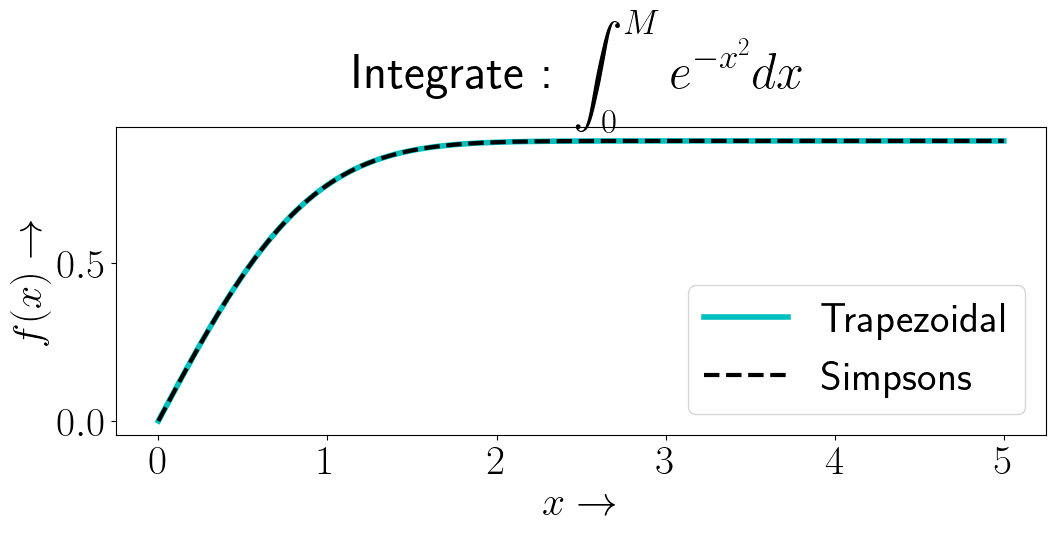

In [9]:
a = 10000               # for step size = 0.0001
n = 5 * a
A = [i/a for i in range(n+1)]
t = ([trapz(lambda x : np.exp(-x**2),0,M,100)for M in A])
s = ([simps(lambda x : np.exp(-x**2),0,M,100)for M in A])

plt.plot(A,t,'c-', linewidth=4)
plt.plot(A,s,'k--', linewidth=3)
plt.xlabel(r'$x \rightarrow$')
plt.ylabel(r'$f(x) \rightarrow$')
plt.title(r'Integrate : $\displaystyle\int_{0}^M e^{-x^2} dx$', y=1.1)
plt.legend(['Trapezoidal','Simpsons'],loc='lower right')
plt.show()  

Q4. Evaluate the Integral $ \displaystyle \int_{-1}^1 (x^8-3x^6+2x^4) \text{ d}x $ as a function of step size  using both the progams.

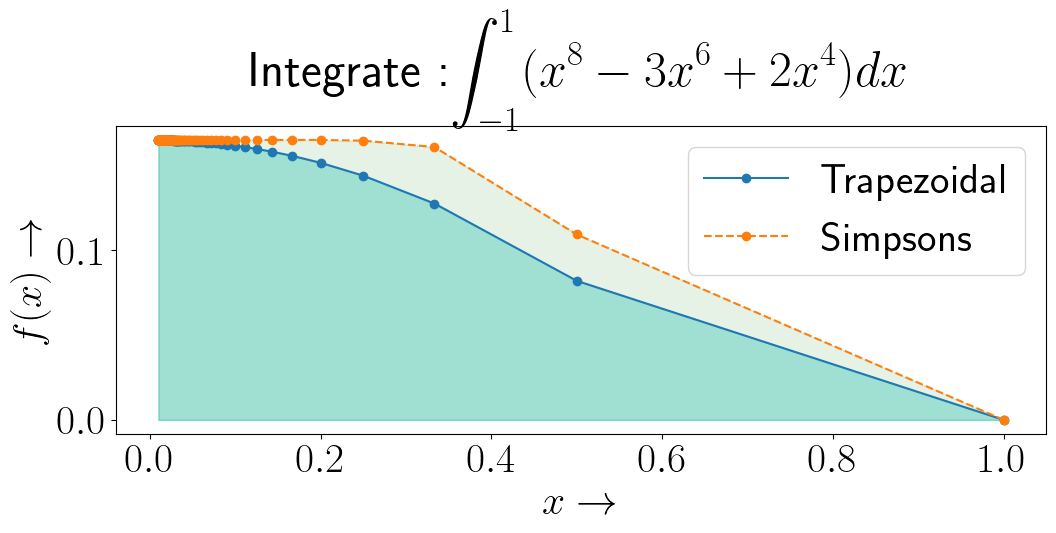

In [10]:
a = -1
b = 1
A = [2*i for i in range(1,101)]
h = [(b-a)/j for j in A]               # setting step size
t = [trapz(lambda x : ((x**8)-(3*x**6)+(2*x**4)),a,b,M) for M in A]
s = [simps(lambda x : ((x**8)-(3*x**6)+(2*x**4)),a,b,M) for M in A] 

plt.plot(h,t,'o-')
plt.plot(h,s,'o--')

plt.fill_between(h,t, color='c', alpha=0.3)
plt.fill_between(h,s, color='g', alpha=0.1)

plt.xlabel(r'$x \rightarrow$')
plt.ylabel(r'$f(x) \rightarrow$')
plt.title(r'Integrate :$\displaystyle\int_{-1}^1 (x^8-3x^6+2x^4)dx$',y=1.1)
plt.legend(['Trapezoidal','Simpsons'])
plt.show()

# $$ \text{ASSIGNMENT 2} $$
## $$\text{Integration using Gaussian method }$$ $$\\\text{and comparing using scipy.integrate.fixed_quad()}$$

In [11]:
def gauss(f,a,b,N=50):
    V = rl(N)
    t = V[0]
    w = V[1]
    x = ((b-a)/2)*t + (b+a)/2
    k = ((b-a)/2)*f(x)
    G = sum(w*k)
    return G

### $\text{Example 1}: \displaystyle \int_{1}^{2} {x^k} \text{ d}x \text{ for n itterations. Check for }k =  [ 9,13,17] \text{ and } n = [5,7,9]$



In [12]:
a=1
b=2
k=[9, 13, 17]
n=[5, 7, 9]

K,N,T,S,G,FQ=[],[],[],[],[],[]
for k,n in zip(k,n):
    f = lambda x : x**k
    K.append(k)
    N.append(n)
    T.append(trapz(f,a,b,n))
    S.append(simps(f,a,b,n+1))
    G.append(gauss(f,a,b,n))
    FQ.append(si.fixed_quad(f,a,b,n=n)[0])
    
pd.DataFrame({'k':K,'n':N, 
             'trapezoidal method ':T,
             r"simpson's $\frac{1}{3}^{rd}$ method ":S,
             'Gauss method':G,
             "fixed quad ":FQ})

,k,n,trapezoidal method,simpson's $\frac{1}{3}^{rd}$ method,Gauss method,fixed quad
0,9,5,109.879919,102.432919,102.300000,102.300000
1,13,7,1259.745519,1172.498162,1170.214286,1170.214286
2,17,9,15695.725747,14598.691759,14563.500000,14563.500000


### $\text{Example 2}: \displaystyle \int_{0}^{\pi} x \sin x \text{ d}x \text{ for fixed value of n and verify the value.}$

In [13]:
n=1
I_old=0
diff=2
while abs(diff)>1e-10:
    I_new=gauss(lambda x : x*np.sin(x),0,np.pi,n)
    diff  = I_new-I_old
    I_old = I_new 
    n = n+1
    
print('I_new\t\t\t n-1', '\t' ,' abs(diff)')    
print(I_new,' \t', n-1,'\t', abs(diff))
print('\nfixed quad :',si.quad(lambda x : x*np.sin(x),0,np.pi)[0])

I_new			 n-1 	  abs(diff)
3.141592653589787  	 8 	 2.8177460364986473e-12

fixed quad : 3.141592653589793


# $$ \text{ASSIGNMENT 3} $$

 Q1. Show that for the normal probability distribution is described by the Gaussian function
 $$ \displaystyle\large{\lim_{\sigma \to 0} \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2 {\sigma}^2}} = \delta(x-\mu)} $$ where $\mu$ is the mean and $\sigma$ the standard deviation:  $ \\ \qquad\qquad\int \cos x\delta(x-\mu) dx = -1 \quad\text{ where }\mu = \pi$

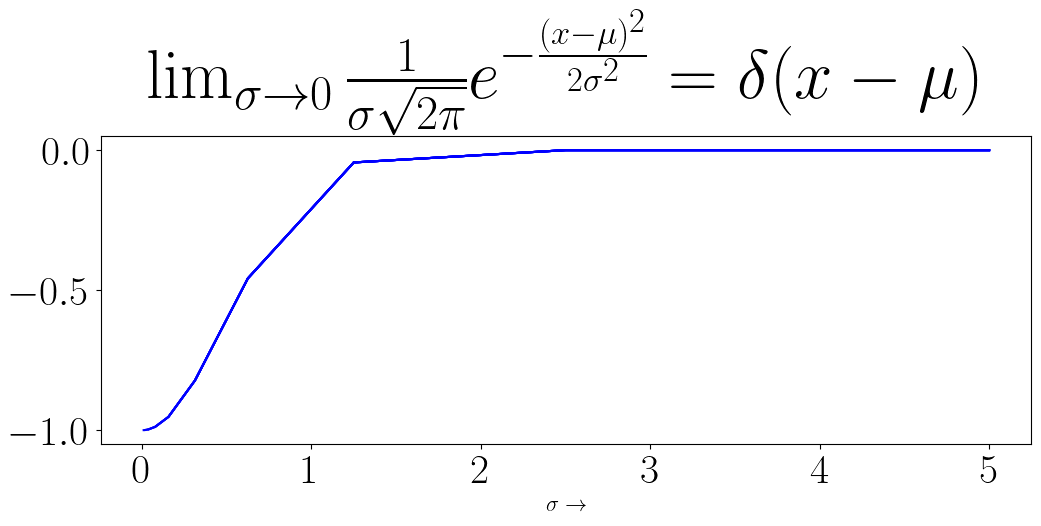

In [14]:
𝜎=10
𝜇=np.pi
E,Σ=[],[]

def f(x):
    return np.cos(x)*(1/(𝜎*(2*𝜇)**0.5))*np.exp(-(x-𝜇)**2/(2*(𝜎)**2))
for i in range(10):
    𝛿=si.quad(lambda x:f(x),np.pi-5*(𝜎),np.pi+5*(𝜎),limit=200)[0]
    𝜎=𝜎*0.5
    E.append(𝛿)
    Σ.append(𝜎)
    plt.plot(Σ,E,'b-')
    plt.xlabel(r'$ \sigma \rightarrow $',fontsize=16)
plt.title(r'${\lim_{\sigma\to 0}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2{\sigma}^2}}=\delta(x-\mu)}$' ,
          fontsize=50)
plt.show()

 Q2. Show that $\large\displaystyle{\lim_{\epsilon \to 0} \frac{1}{\pi}\bigg(\frac{\epsilon}{x^2 + \epsilon^2}\bigg) = \delta(x)} $ by applying it on two functions of $x$.

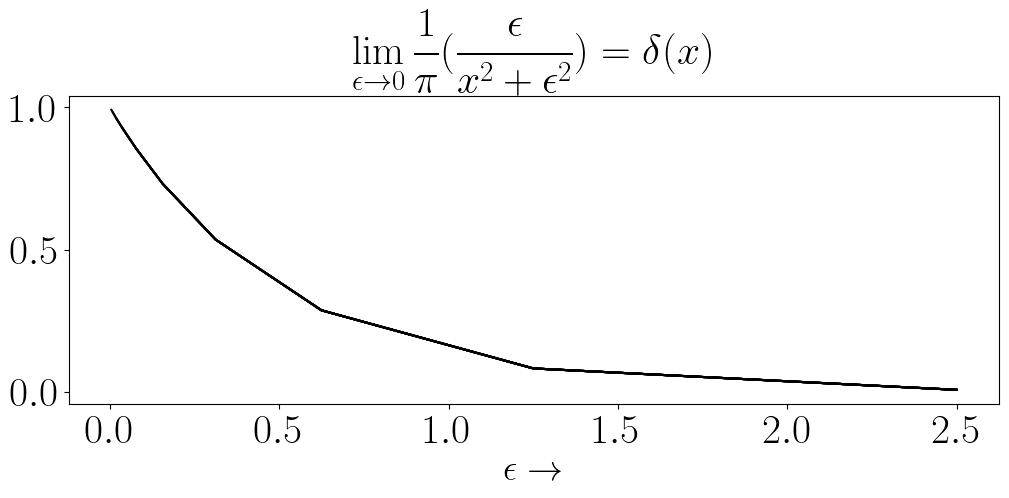

In [15]:
𝜖=5
A,s = [],[]

def f(x):
    return np.cos(x)*(1/np.pi)*(𝜖/(x**2+𝜖**2))

for i in range(10):
    a=si.quad(lambda x:f(x),-150*𝜖,150*𝜖,limit=500)[0]
    𝜖=𝜖*0.5
    A.append(a)
    s.append(𝜖)
    plt.plot(s,A,'k-')
    plt.xlabel(r'$ \epsilon \rightarrow $',fontsize=26)
plt.title(r'$\displaystyle{\lim_{\epsilon\to 0}\frac{1}{\pi}\bigg(\frac{\epsilon}{x^2+ \epsilon^2}\bigg)= \delta(x)}$',
          fontsize=30)
plt.show()

 Q3. Plot the following function in the domain $(-4\pi \le x \le 4\pi) :$ $ \\ $ $$ f(x)=\tan^{-1}x \textrm{  for  } 0\le x <2\pi \textrm{  and  } f(x+2\pi)=f(x)$$ $\\ $
     Reconstruct this function with its **Fourier Components**.

In [16]:
f = lambda x : np.arctan(x%(2*np.pi))
x =np.arange(-5.*np.pi,5.01*np.pi,0.001) 

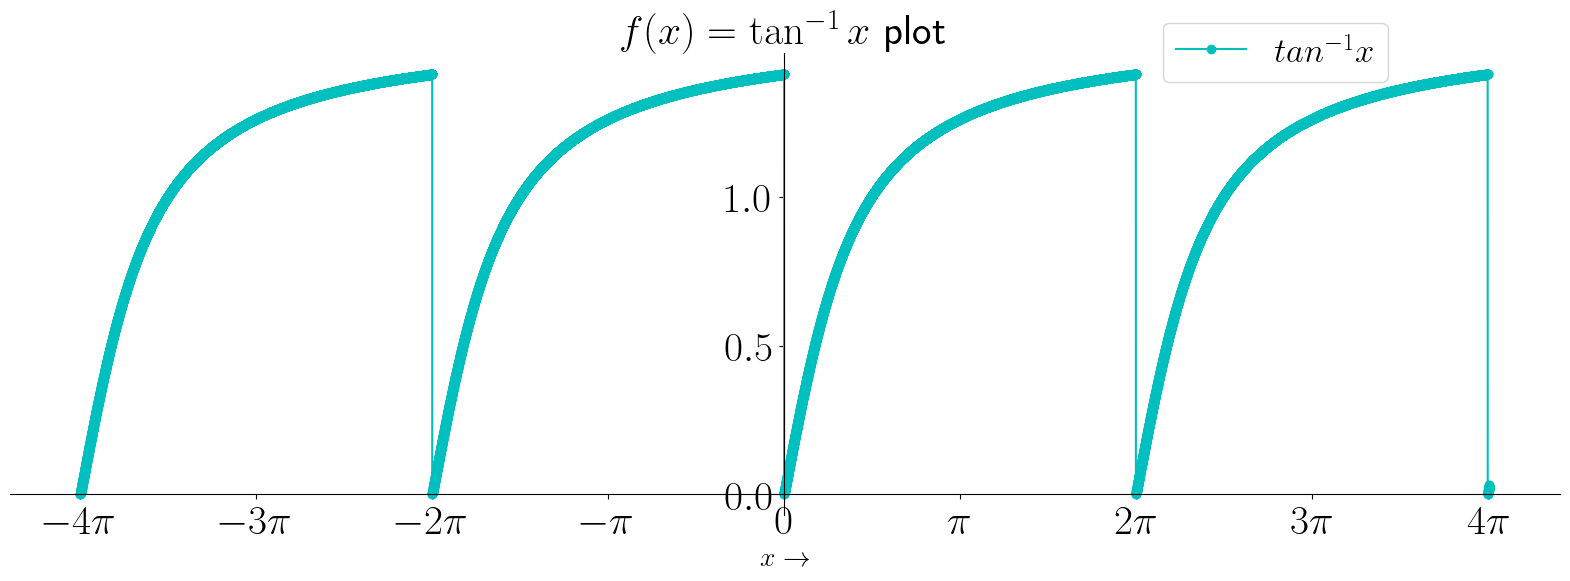

In [17]:
q1=[(-4*np.pi),(-3*np.pi),(-2*np.pi),(-np.pi),0,np.pi,(2*np.pi),(3*np.pi),(4*np.pi)]
q2=[r'${-4\pi}$',r'${-3\pi}$',r'${-2\pi}$',r'${-\pi}$',r'$0$',
    r'${\pi}$',r'${2\pi}$',r'${3\pi}$',r'${4\pi}$']

fig = plt.figure(figsize=(20,6))
a = fig.add_subplot(111)
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.plot(x,f(x),'co-')
ax.legend(['$tan^{-1} x$'],bbox_to_anchor=(0.9, 0.9),fontsize=25)
xlim(1.1*x.min(), 1.1*x.max())
xticks(q1,q2, fontsize=30)
xlabel(r'$ x \rightarrow $', fontsize=20)
plt.title(r'$f(x)=\tan^{-1}x $ plot',fontsize=30)
plt.show()

### For a function of fourier
### $ \qquad\quad\displaystyle{f(x) = \frac{a_o}{2} + \sum_{n=1}^\infty a_n \cos nx + \sum_{n=1}^\infty b_n \sin nx }$
### where,
### $ \displaystyle{\qquad a_o = \frac{1}{2\pi} \int_{0}^{2\pi} f(x) \text{ d}x }$
### $ \displaystyle{\qquad a_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \cos nx \text{ d}x }$
### $ \displaystyle{\qquad b_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) \sin nx \text{ d}x \text{ for n = 1,2,3,4.....}}$

In [18]:
def plot_results(f,x, N):
    def my_fourier_coef(f,n):
        A,B=[],[]
        An=(1/np.pi)*si.quad(lambda x:np.cos(n*x)*f(x),-np.pi,np.pi,limit=200)[0]
        A.append(An)
        Bn=(1/np.pi)*si.quad(lambda x:np.sin(n*x)*f(x),-np.pi,np.pi,limit=200)[0]
        B.append(Bn)
        return A,B
    
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0*np.ones(len(x))/2                 # A₀
    
    for n in range(1, N+1):
        [An, Bn] = my_fourier_coef(f, n)     # An,Bn
        y += An*np.cos(n*x)+Bn*np.sin(n*x)
        
    fig=plt.figure(figsize = (16,6))
    a = fig.add_subplot(111)
    ax = gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.plot(x, f(x),'co-',alpha=0.9, label = "analytic")
    ax.plot(x, y,'k-.', label = "approximate")
    ax.set_xlabel("x")
    ax.set_ylabel("$tan^{-1} x$")
    plt.legend(bbox_to_anchor=(1.35, 0.75),fontsize=30,loc='center right')
    xlim(1.1*x.min(), 1.1*x.max())
    
    xticks(q1,q2, fontsize=30)
    xlabel(r'$ x \rightarrow $', fontsize=20)
    plt.title(f"{N}th Order Fourier Approximation")  
    #plt.show()
    return None

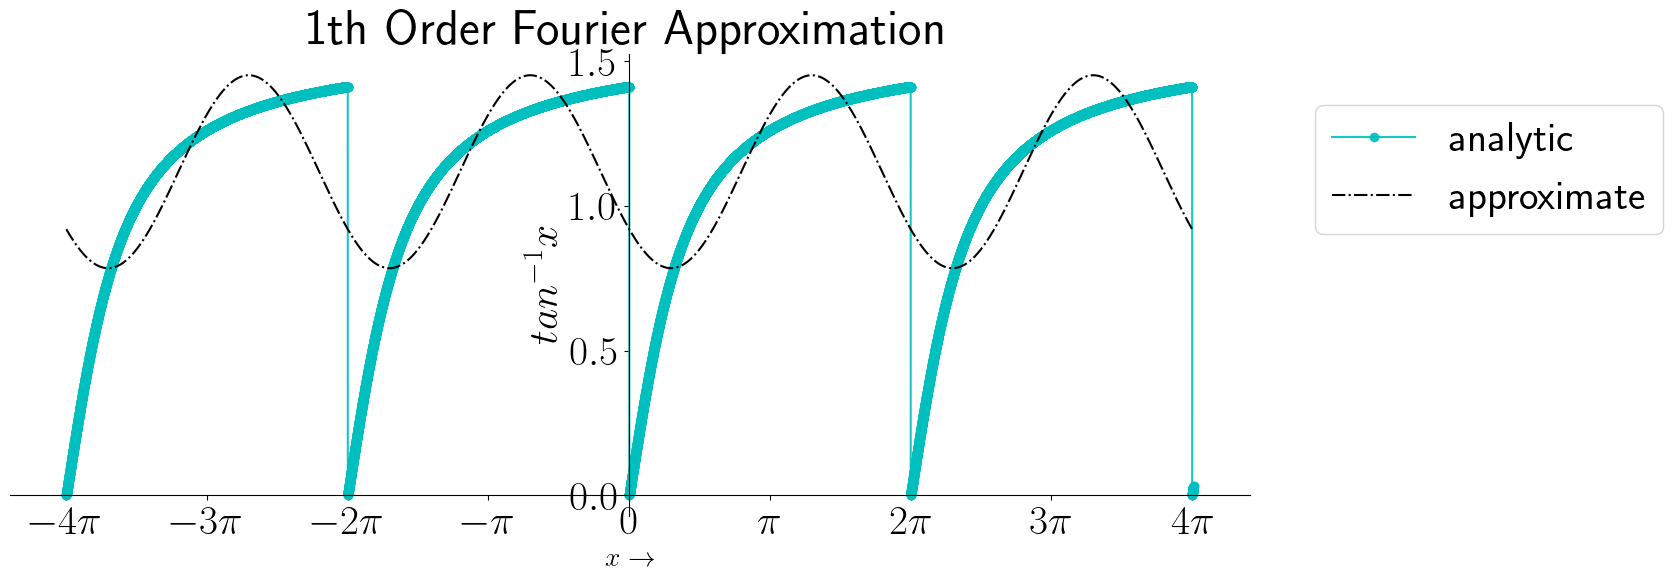

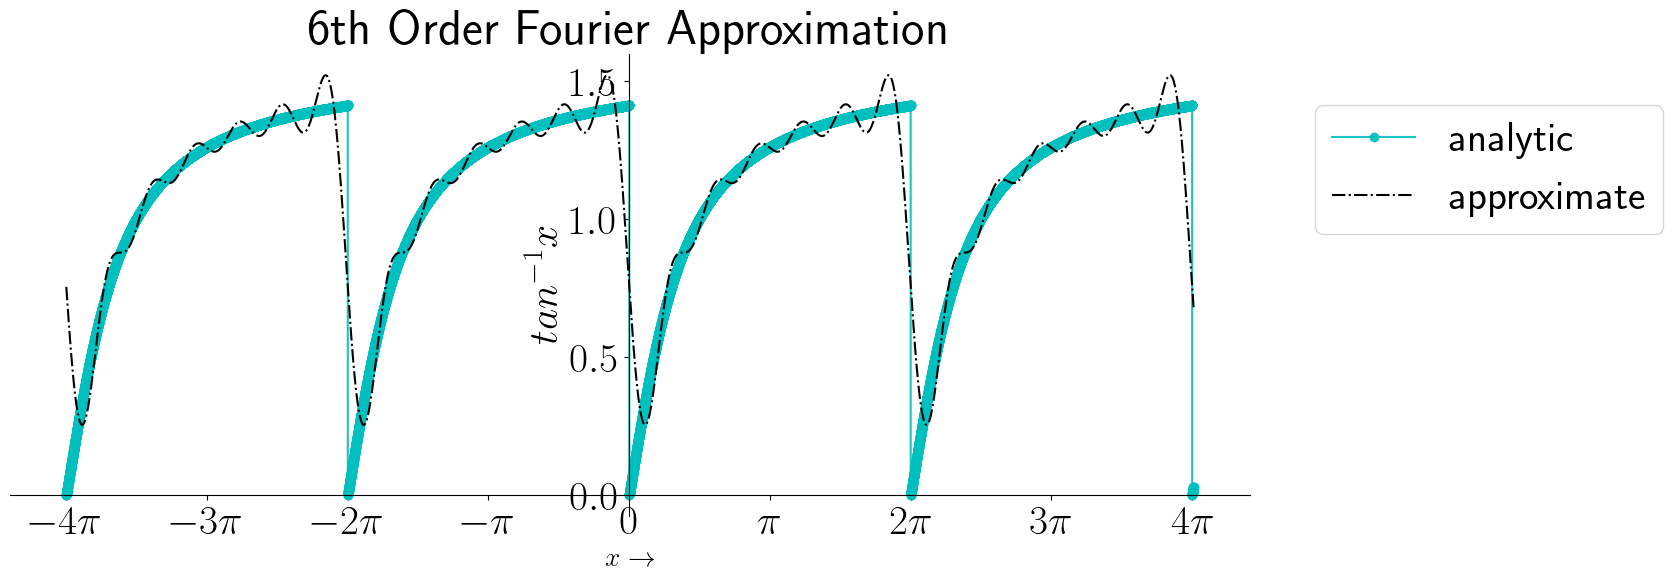

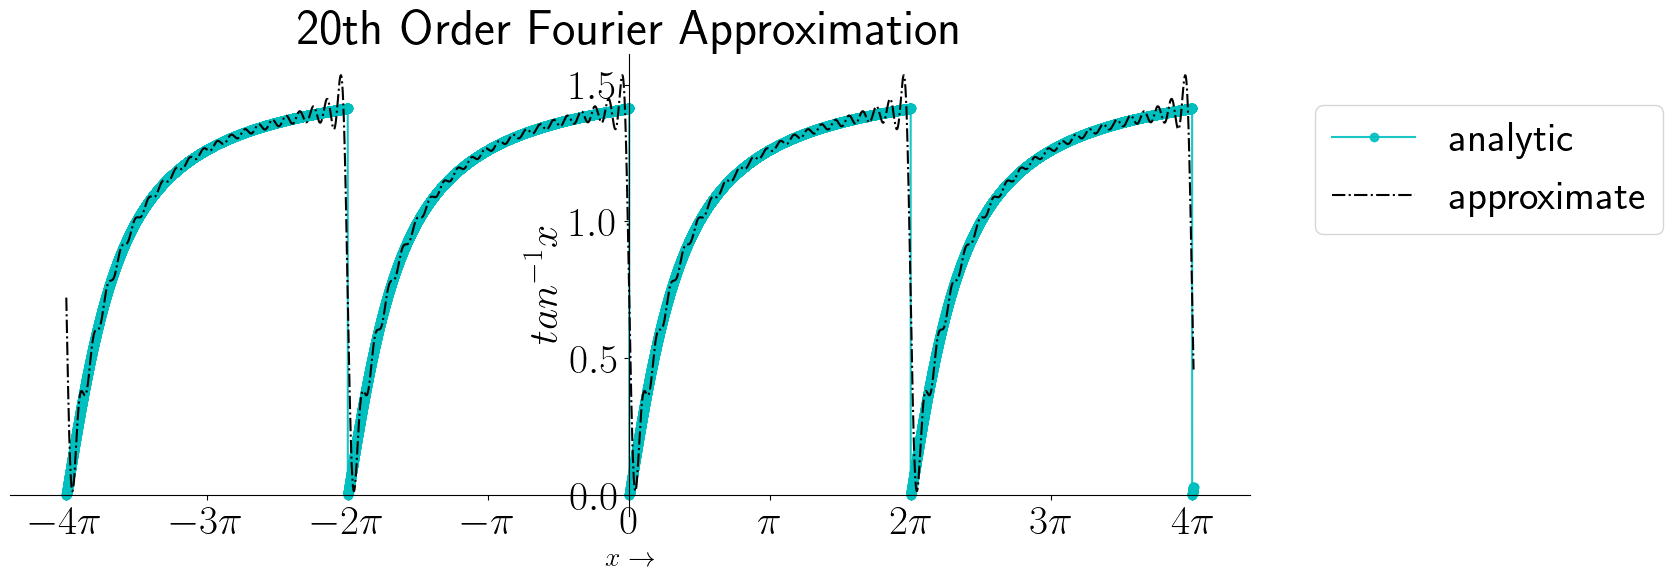

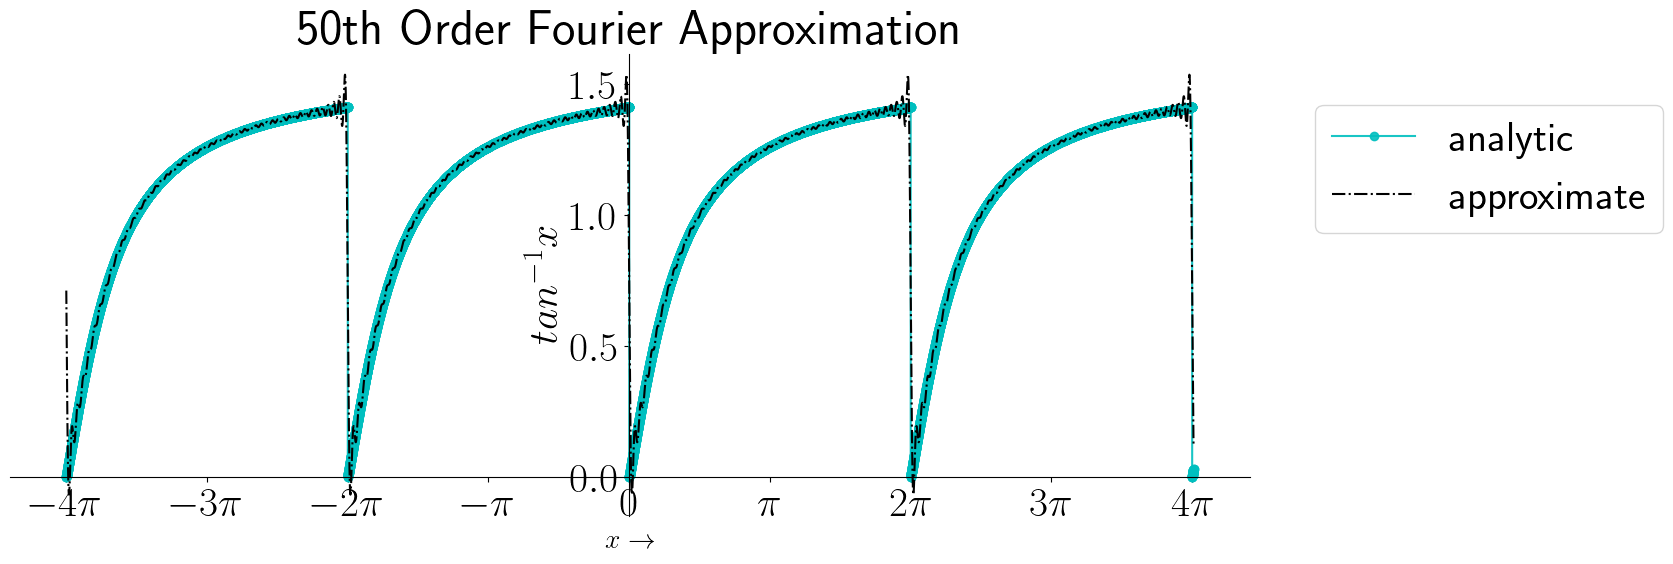

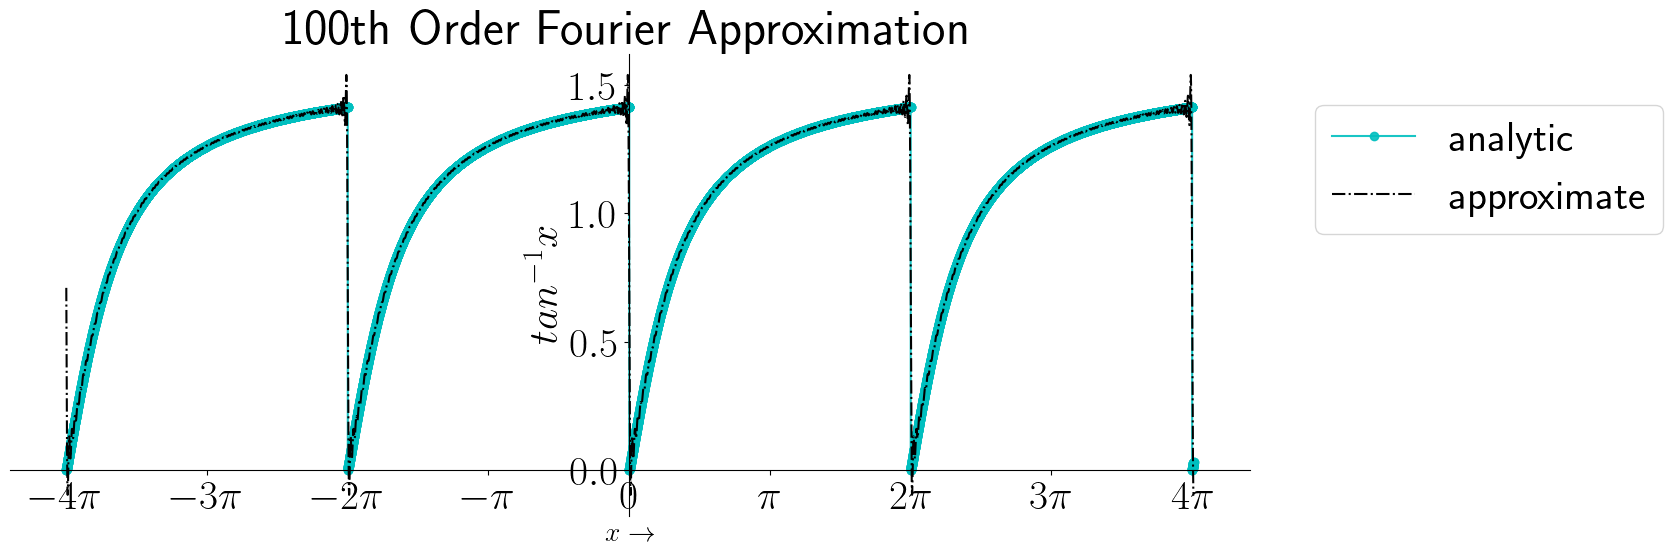

In [19]:
maxn=[1,6,20,50,100]
for n in maxn:
    plot_results(f,x, n)
show()

$\text{Comments : We see on increasing the no. of intervals the fourier plot matches the graph plot ,} $                   
$\qquad \qquad \ \ \text{ but we observe that there's a flux gathered at the top-right-end of the plot wihich is the Gaussian flux.}$

Q4. Plot the Fourier integral of the function:
$$ f(x)=x\exp{\bigg(-\frac{x^2}{2\sigma^2}\bigg)}$$
Plot the imaginary part as a function of $k$ for three values of $\sigma$.                                                 
Show that as increases the momentum uncertainty decreases. Also show that the real parts are zero in all cases.

,position,value
0,$|$Real F(X)$|_{\sigma_{1}} $,0.0
1,$|$Real F(X)$|_{\sigma_{2}} $,0.0
2,$|$Real F(X)$|_{\sigma_{3}} $,0.0


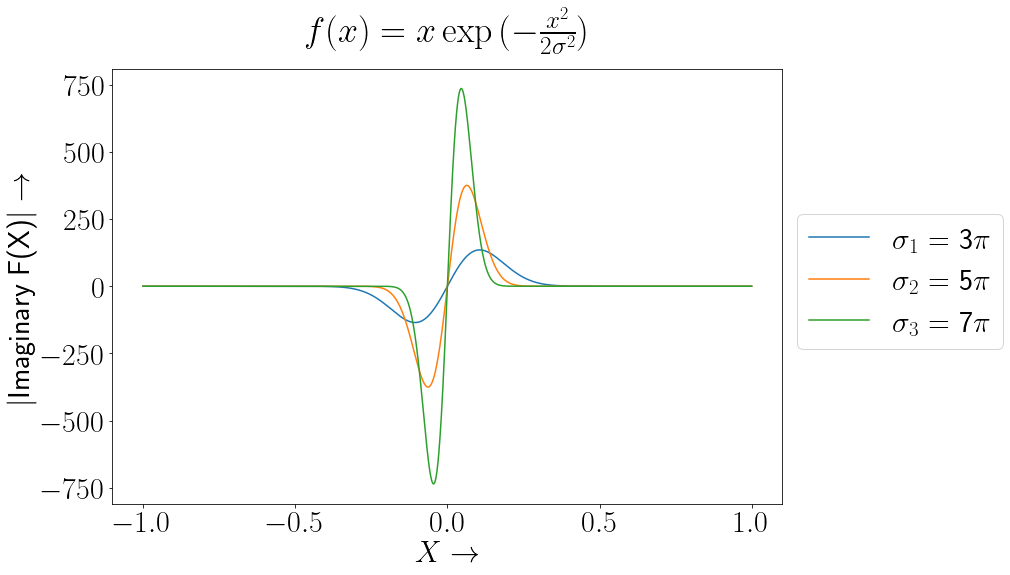

In [20]:
def FI(k,s):
    
    def f(x,k,s):
        return x*np.exp(-(x**2/(2*s**2)))*np.cos(k*x)

    def g(x,k,s):
        return x*np.exp(-(x**2/(2*s**2)))*np.sin(k*x)
    
    sigma=np.pi*s
    Real=[[si.quad(f,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma]
    Imag=[[si.quad(g,-np.inf,np.inf,limit=1000,args=(i,j))[0] for i in k] for j in sigma] 
    return Real,Imag

k=np.arange(-1,1,0.001)
s=np.array([3, 5, 7])
Rsigma,Rsigmal=[],[]
for i in range(len(s)):
    Real,Imag = FI(k,s)
    Rsigma.append(norm(Real[i]))
    Rsigmal.append(r'$|$Real F(X)$|_{\sigma_{%i}} $'%(i+1))
    plt.plot(k,Imag[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,s[i]))
display(pd.DataFrame({'position':Rsigmal,'value':Rsigma}))
plt.xlabel(r"$X \rightarrow$")
plt.ylabel(r"$|$Imaginary F(X)$| \rightarrow$")
plt.legend(bbox_to_anchor=(1, 0.7))
plt.title(r'$ f(x)=x\exp{(-\frac{x^2}{2\sigma^2})}$',y=1.05)    
plt.show()

Q5. Calculate the Fourier integral of the following functions and the then plot the power spectrum, $ | \textrm{Fourier Transformation}|^2$ as a function of frequency :

a) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } 0\le x\le a,\\ 0 & \textrm{ elsewhere } \end{array} \right.$
             (Repeat the problem for a= 1, 3, 5). Put comments about your observations on the effect of increasing $a$.
             
b) $f(x)=\sin x +\sin 2x$   

c) $f(x)=\left\{\begin{array}{rl}\sin x & \textrm{ for } x<0,\\ \sin 2x & \textrm{ for } x \ge 0 \end{array} \right. \qquad$
     (Comment on the differences between the power spectrum of case (b) and (c)

In [21]:
def FT_5a(s,T):
    sigma = np.pi*s
    
    def fsin(x,t):
        return np.sin(x)*np.sin(x*t)

    def fcos(x,t):
        return np.cos(x)*np.cos(x*t)
    
    yr=[[si.quad(fcos,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
    yi=[[si.quad(fsin,0,i,args=(t),limit=500)[0] for t in T] for i in sigma]
    y=[[yr[i][t]**2 + yi[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]
    return y

In [22]:
def FT_5b(s,T):
    sigma=np.pi*s
    
    def fsin(x,t):
        return (np.sin(x) + np.sin(2*x))*np.sin(x*t)

    def fcos(x,t):
        return (np.sin(x) + np.sin(2*x))*np.cos(x*t)
     
    yr=[[si.quad(fcos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
    yi=[[si.quad(fsin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
    y=[[yr[i][t]**2 + yi[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]
    return y

In [23]:
def FT_5c(s,T):
    sigma=np.pi*s
    def fsin(x,t):
        return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.sin(x*t)

    def fcos(x,t):
        return (np.sin(x)*(x<0) + np.sin(2*x)*(x>0))*np.cos(x*t)
    
    yr=[[si.quad(fcos,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma] 
    yi=[[si.quad(fsin,-i,i,args=(t),limit=500)[0] for t in T] for i in sigma]
    y=[[yr[i][t]**2 + yi[i][t]**2 for t in range(len(T))] for i in range(len(sigma))]
    return y

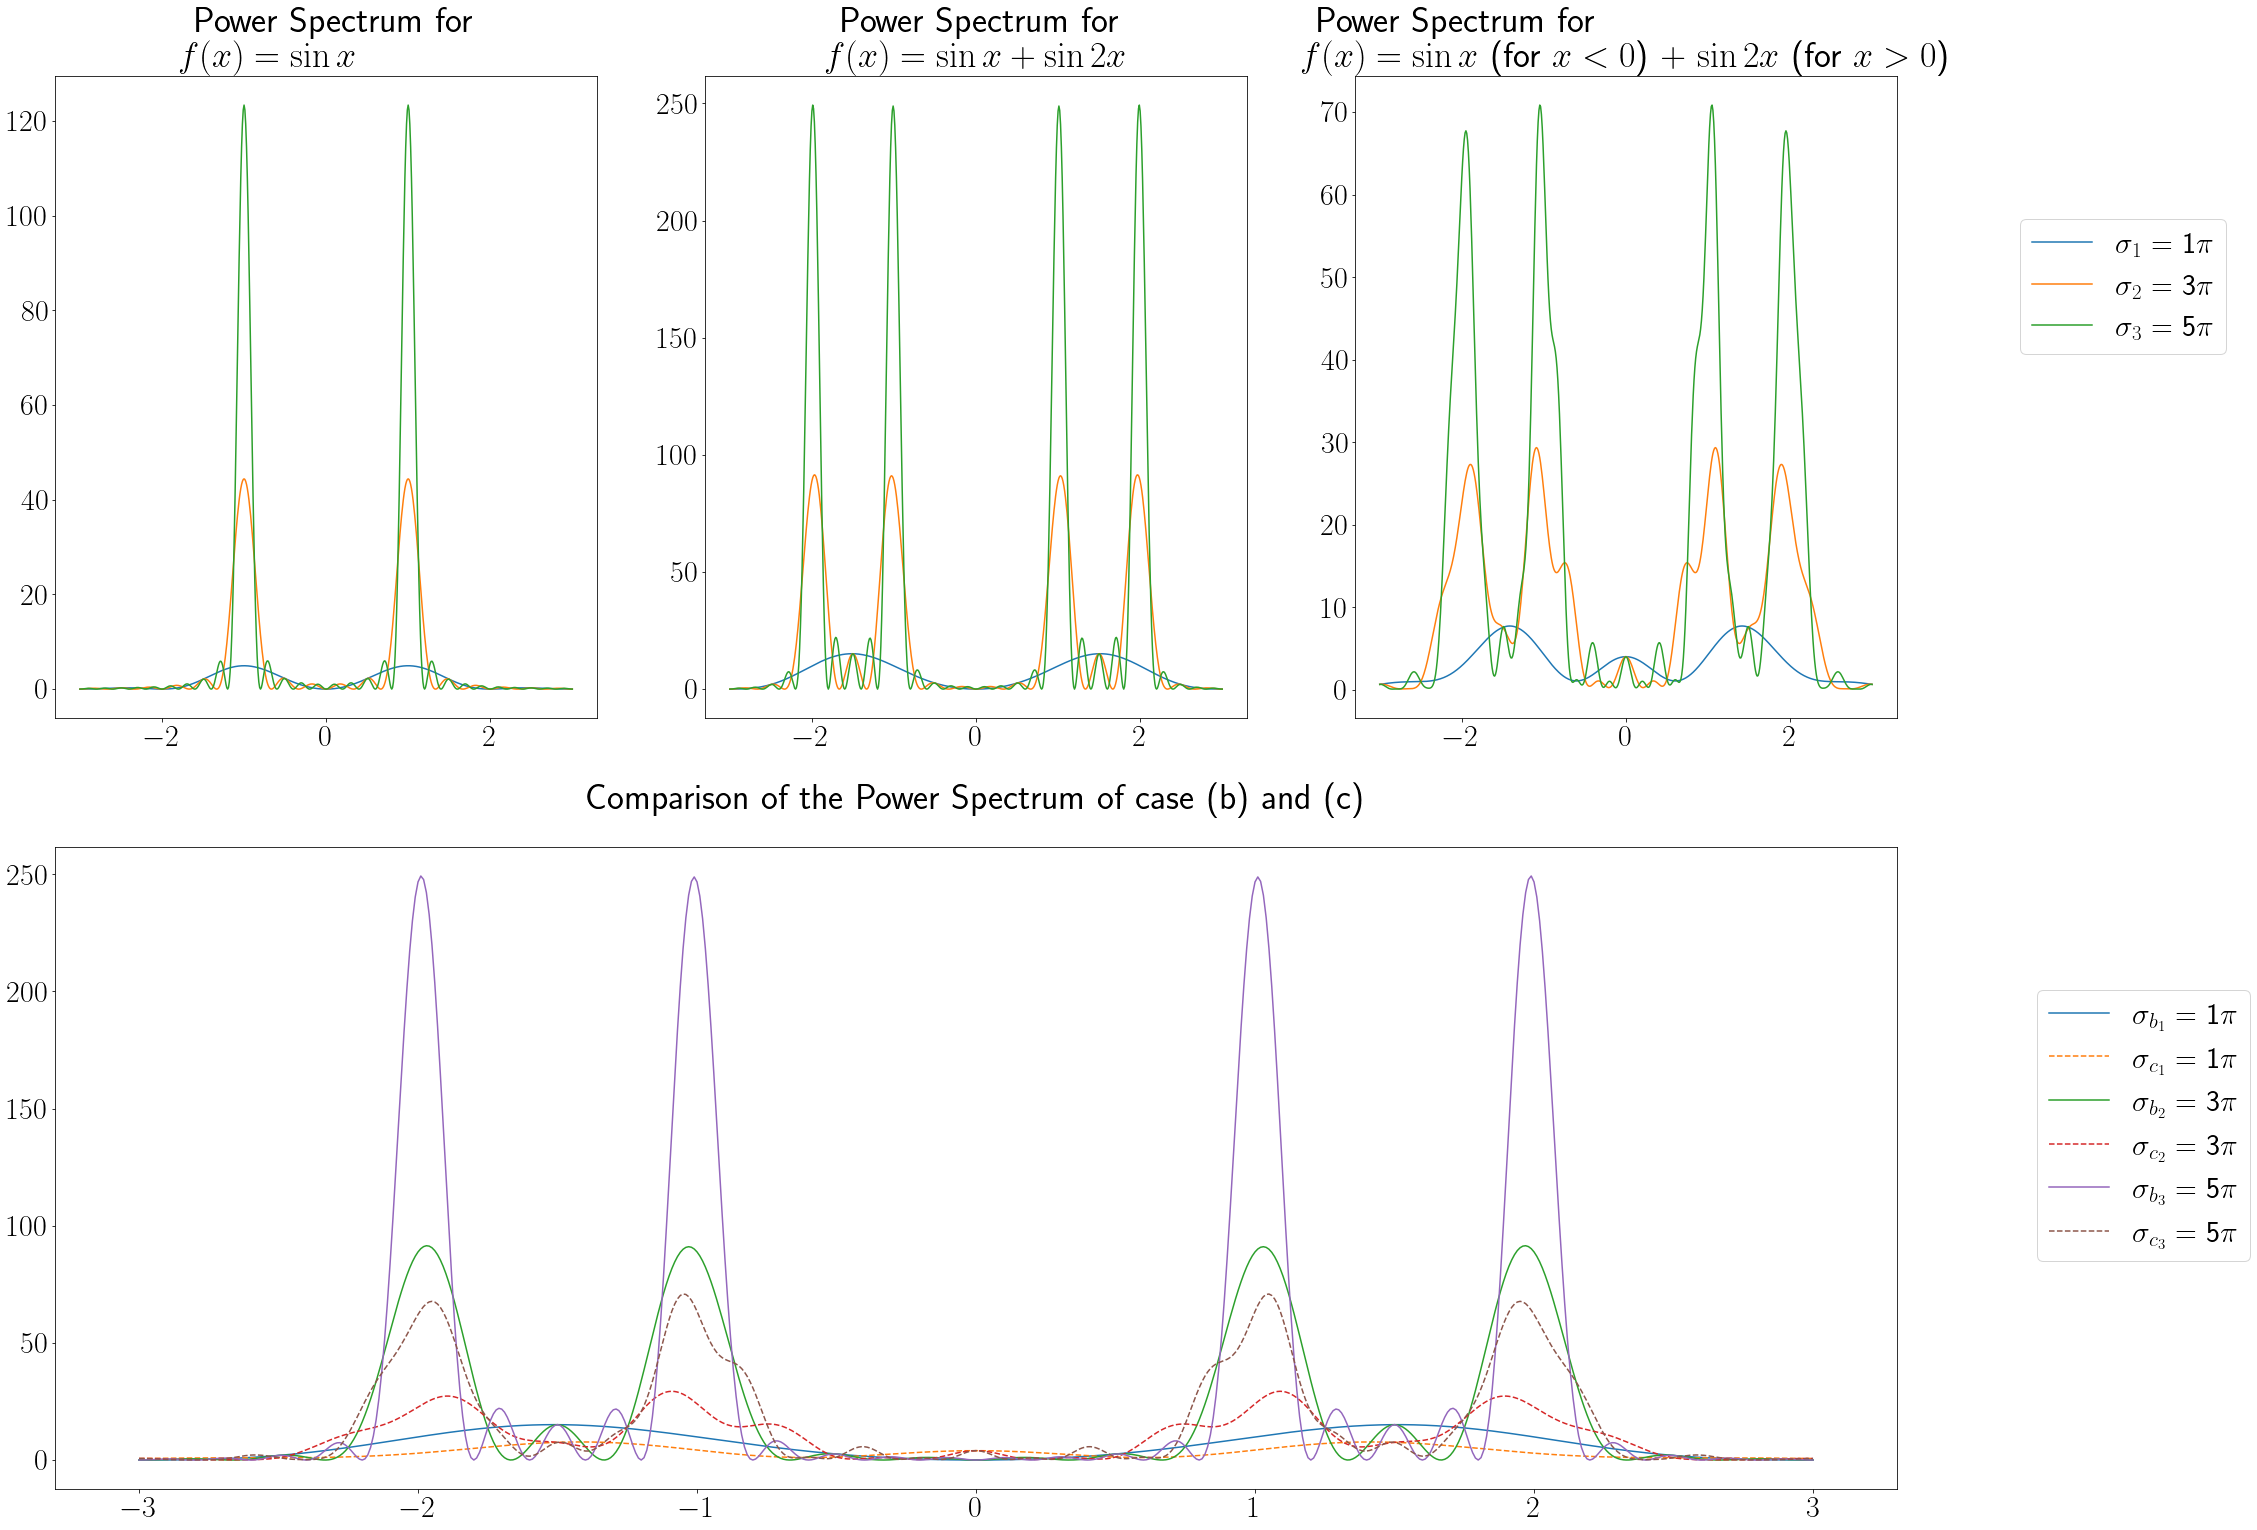

In [24]:
T=np.linspace(-3,3,601)
s=np.array([1, 3, 5])

fig=plt.figure(figsize=(33,26))
gs=fig.add_gridspec(2,3)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax4=fig.add_subplot(gs[1,:])
for i in range(len(s)):
    ax1.plot(T,FT_5a(s,T)[i], label='$\sigma_{%i}$ = %i$\pi$'%(i+1,s[i]))
    ax1.set_title(r' Power Spectrum for $ \\ f(x)=\sin x$') 
    #ax1.legend(bbox_to_anchor=(1.2, 0.8))
    ax2.plot(T,FT_5b(s,T)[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,s[i]))
    ax2.set_title(r' Power Spectrum for $ \\ f(x)=\sin x + \sin 2x$') 
    #ax2.legend(bbox_to_anchor=(1.2, 0.8))
    ax3.plot(T,FT_5c(s,T)[i],label='$\sigma_{%i}$ = %i$\pi$'%(i+1,s[i]))
    ax3.set_title(r' Power Spectrum for $ \\ f(x)=\sin x$ (for $x<0$) + $\sin 2x$ (for $x>0$)')
    ax3.legend(bbox_to_anchor=(1.2, 0.8))
    ax4.plot(T,FT_5b(s,T)[i],'-',label='$\sigma_{b_{%i}}$ = %i$\pi$'%(i+1,s[i]))
    ax4.plot(T,FT_5c(s,T)[i],'--',label='$\sigma_{c_{%i}}$ = %i$\pi$'%(i+1,s[i]))
    ax4.set_title(r'Comparison of the Power Spectrum of case (b) and (c)',y=1.05)
plt.legend(bbox_to_anchor=(1.2, 0.8))
plt.show()

Q6. Calculate the **FFT** of a signal $ F(t)=\sin 50t.$ Change the sampling frequency and sampling time and see the effect on the power spectrum.                                                                                                       
Do you see your observations in conformation with sampling theorem? You should be able to plot the abscissa of your power spectrum.

sampling : 16 |	freq res. : 0.09999999999999999 |	maxn. frequency : 1.5999999999999999


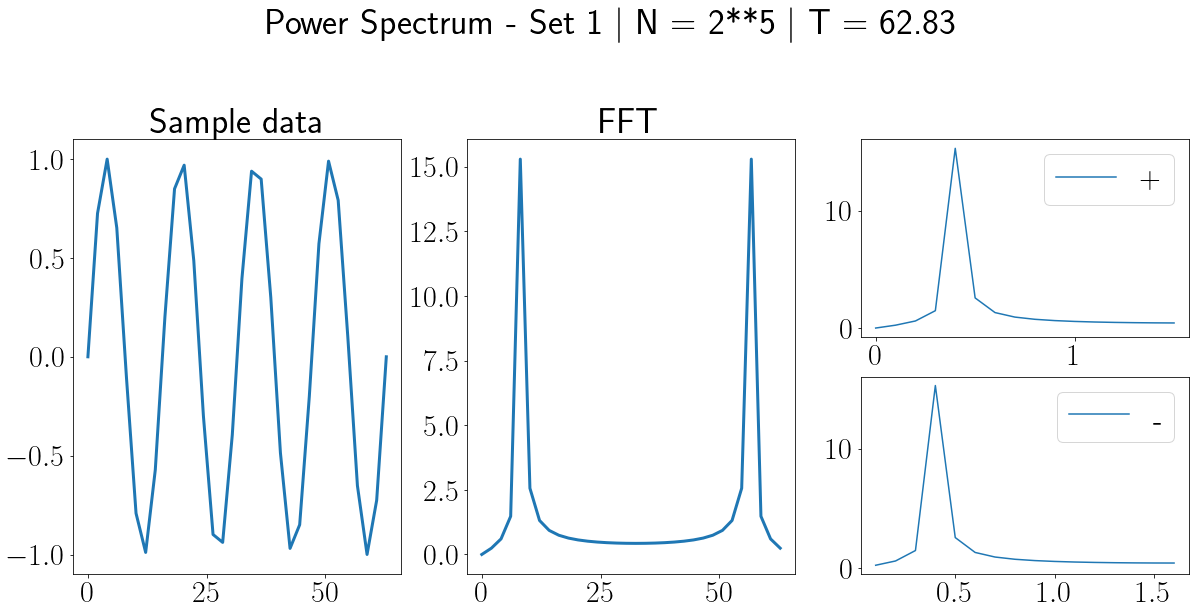

sampling : 128 |	freq res. : 0.06281407035175879 |	maxn. frequency : 8.040201005025125


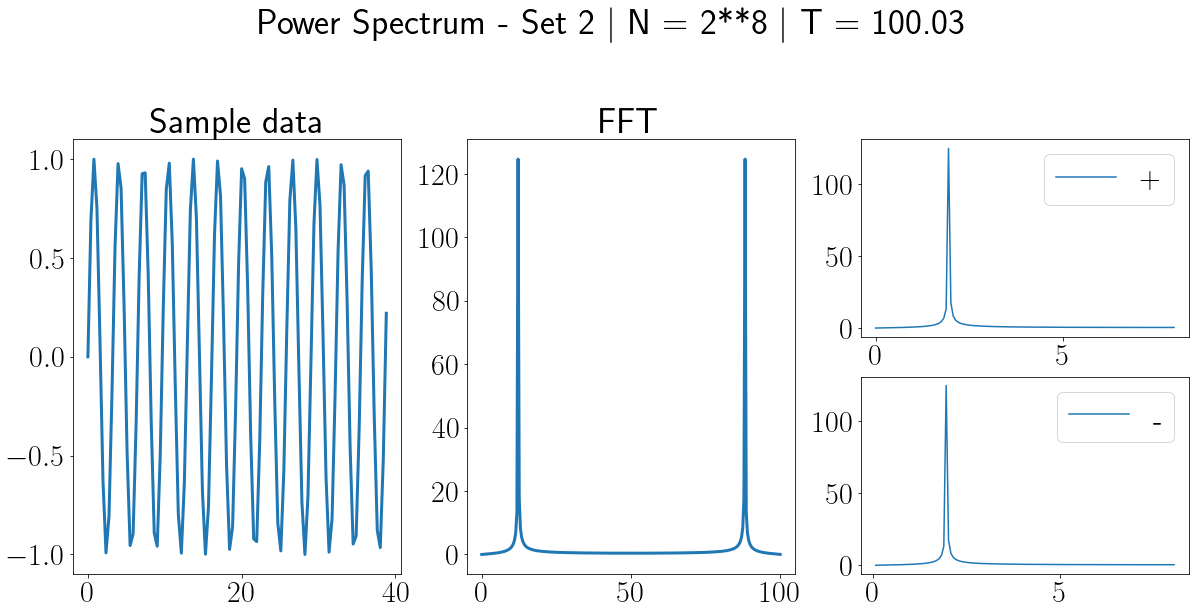

sampling : 2048 |	freq res. : 0.06249999999999999 |	maxn. frequency : 127.99999999999999


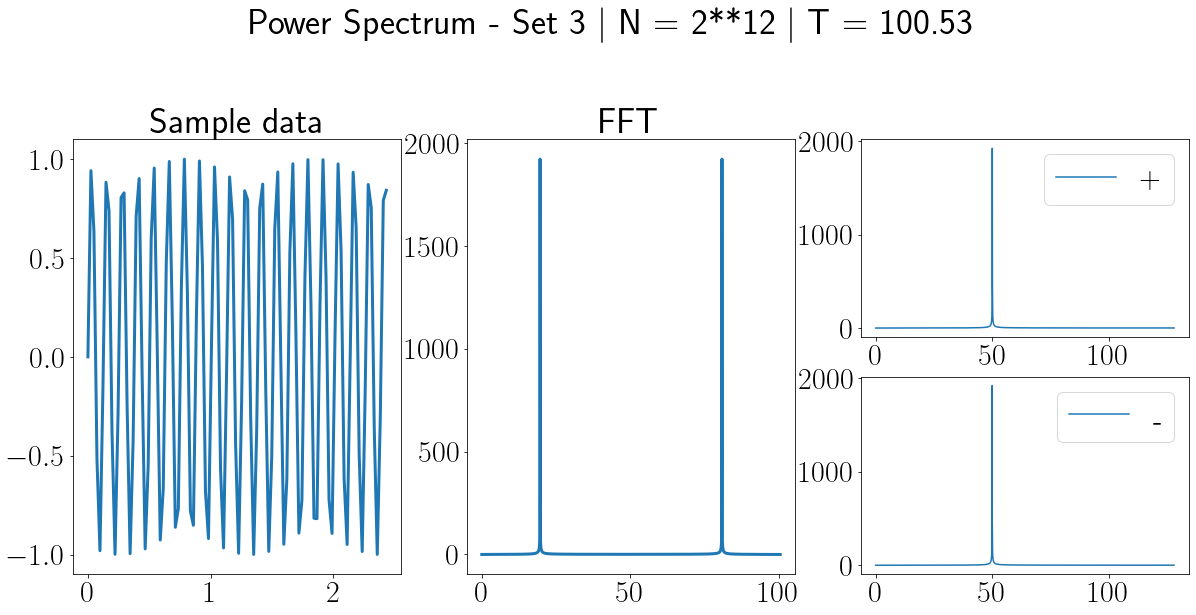

sampling : 64 |	freq res. : 1.9999999999999998 |	maxn. frequency : 127.99999999999999


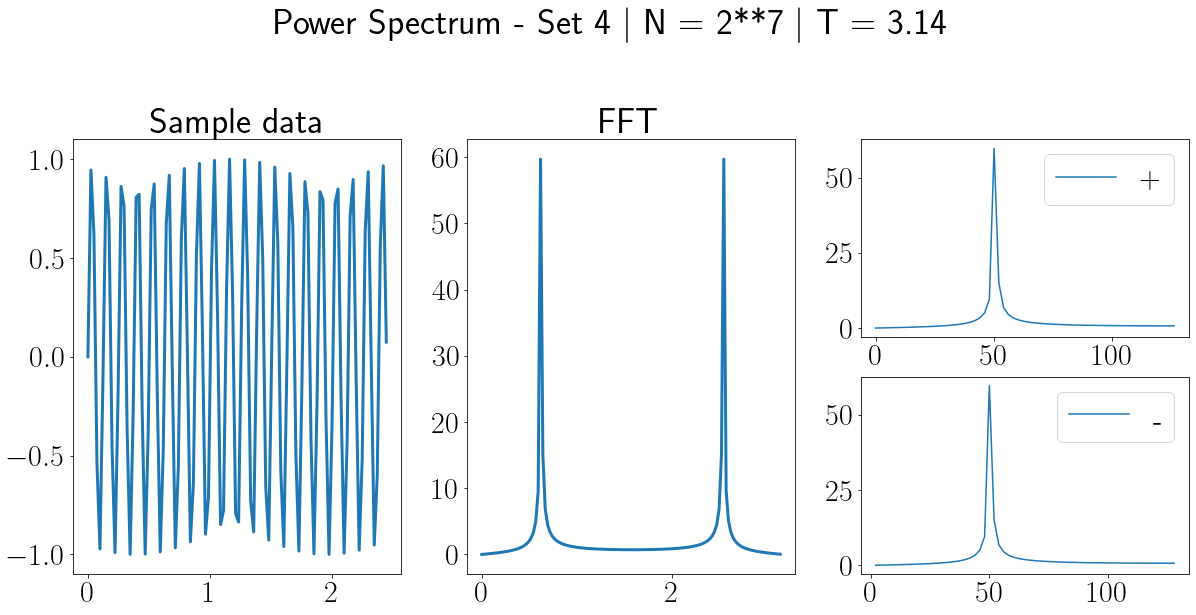

sampling : 128 |	freq res. : 0.22222222222222218 |	maxn. frequency : 28.44444444444444


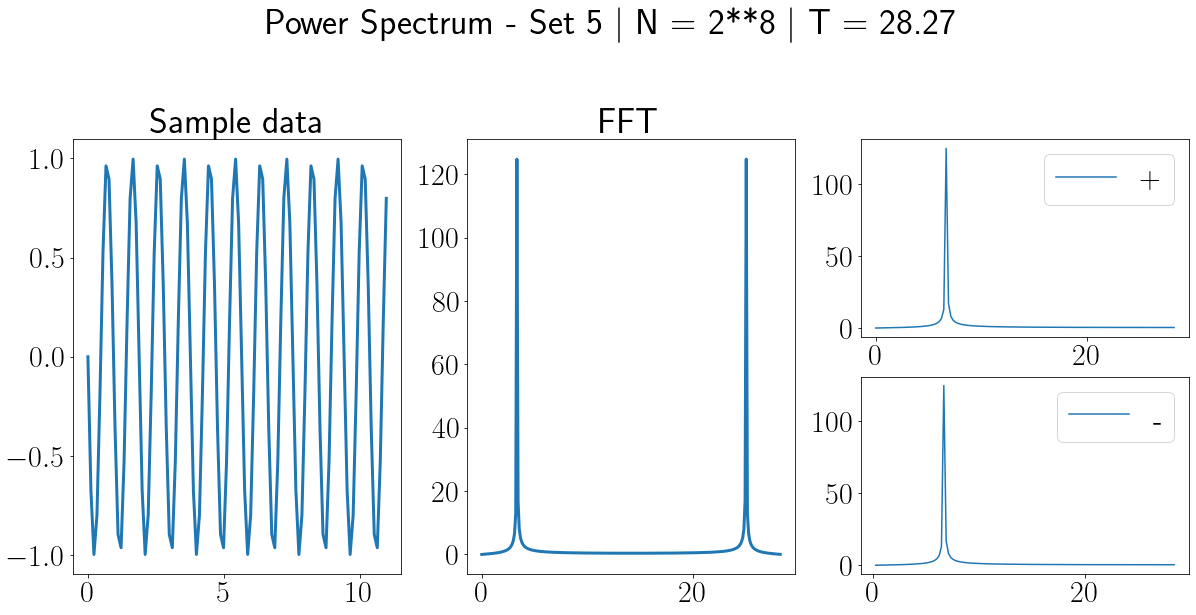

sampling : 512 |	freq res. : 0.049999999999999996 |	maxn. frequency : 25.599999999999998


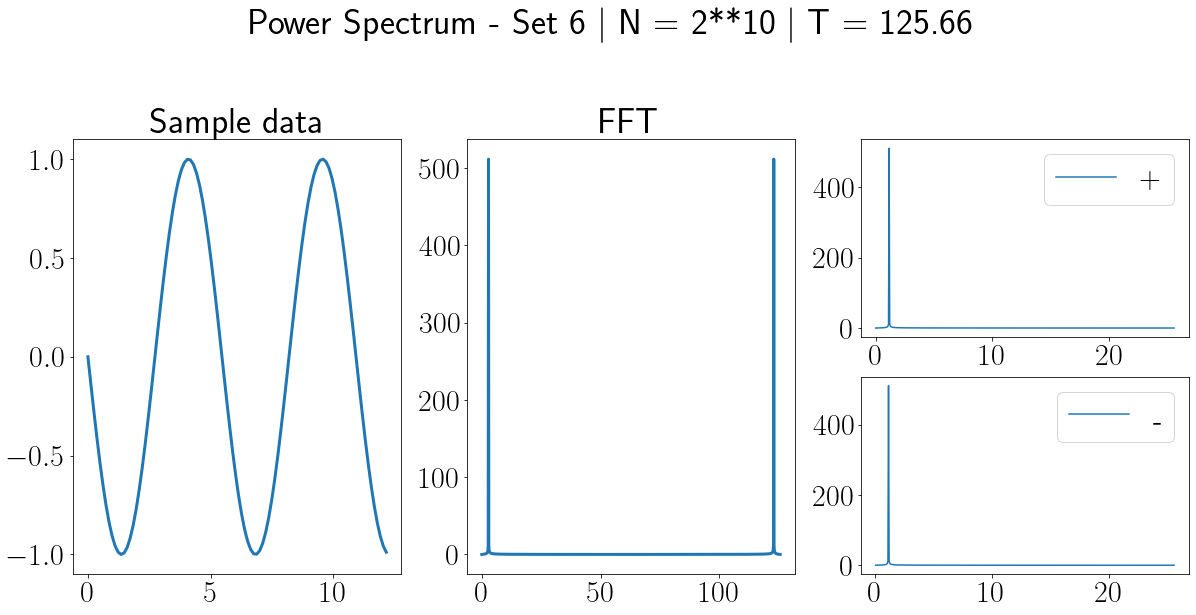

sampling : 2048 |	freq res. : 0.049999999999999996 |	maxn. frequency : 102.39999999999999


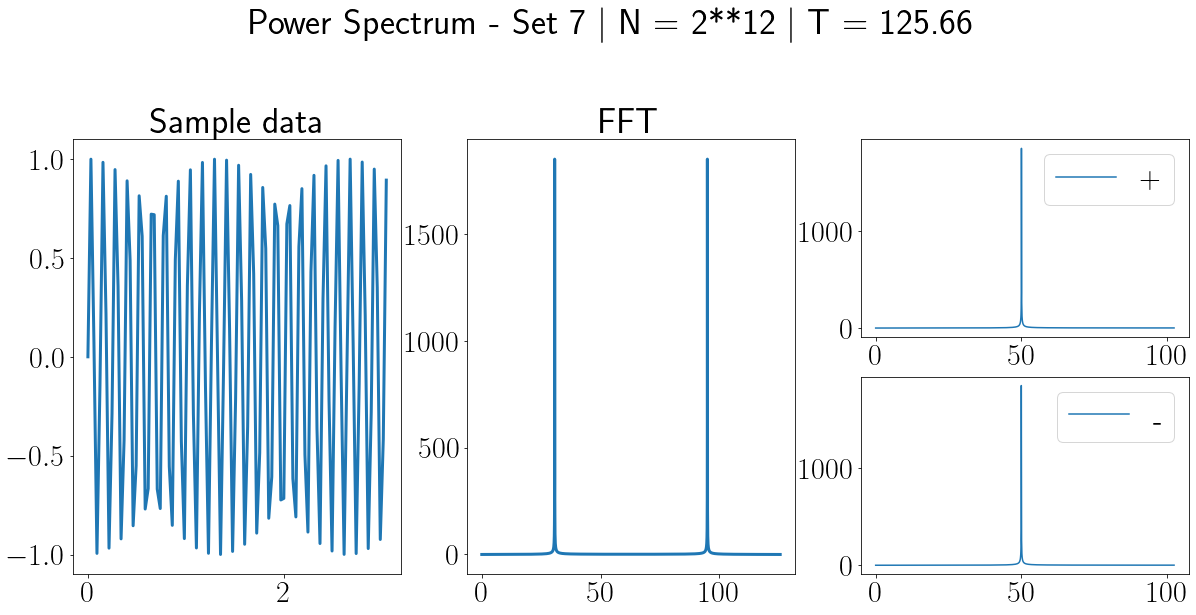

In [25]:
import scipy.fftpack as fft

w=50          # signal frequency
Tp=2*np.pi/w  # signal time period
k=[5,8,12,7,8,10,12]          # intevals
t=[500,796,800,800/(2**5),900/(2**2),1000,1000]
i=[1,2,3,4,5,6,7]

for t,k,i in zip(t,k,i):
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency for sampling
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X)
    Yp=np.abs(fft.fft(Y))
    Wp=np.arange(0,wmax,wo)  # taking the positive side
    Wn=np.arange(-wmax,0,wo) # taking the negative side
    
    fig=plt.figure(figsize=(20,8))
    gs=fig.add_gridspec(2,3)

    ax1=fig.add_subplot(gs[:,0])
    ax2=fig.add_subplot(gs[:,1])
    ax3=fig.add_subplot(gs[0,2])
    ax4=fig.add_subplot(gs[1,2])
    
    plt.suptitle(r'Power Spectrum - Set %i $|$ N = 2**%i $|$ T = %0.2f'%(i,k,T),y=1.11)
    ax1.plot(X[:100],Y[:100],linewidth=3)
    ax1.set_title('Sample data')
    ax2.set_title('FFT')
    ax2.plot(X[:],Yp[:],linewidth=3)
    ax3.plot(Wp,Yp[:Nh])
    ax3.legend('+ve frequencies')
    #ax2.set_title()
    ax4.plot(np.flip(-Wn),np.flip(Yp[Nh:]))
    ax4.legend('-ve frequencies')
    #ax3.set_title()
    plt.show()

Q7. Calculate the **FFT** of a signal $F(t)=\sin t + \sin \pi t $. Plot the signal and its power spectrum. Write your comments.

sampling : 512 |	freq res. : 0.001 |	maxn. frequency : 0.512


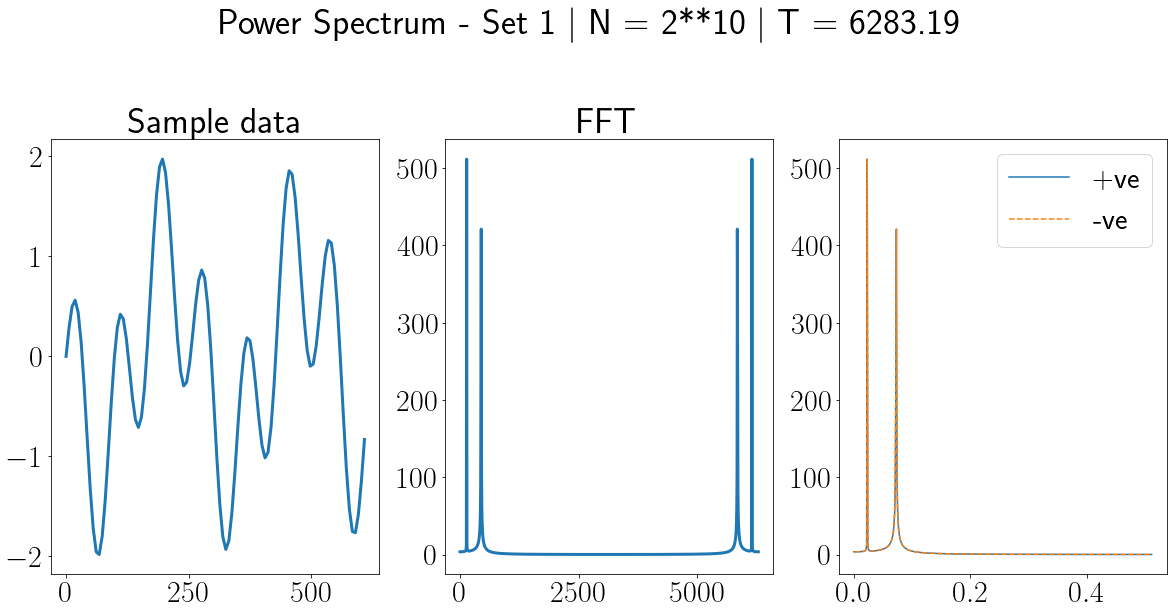

In [26]:
k=[10]          # intevals
t=[1000]
i=[1]

for t,k,i in zip(t,k,i):
    w=1          # signal frequency
    Tp=2*np.pi/w  # signal time period
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency 
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X) + np.sin(np.pi*X)
    YP=np.abs(fft.fft(Y))
    WP=np.arange(0,wmax,wo)  # taking the positive side
    WN=np.arange(-wmax,0,wo) # taking the negative side
    
    fig=plt.figure(figsize=(20,8))
    gs=fig.add_gridspec(2,3)

    ax1=fig.add_subplot(gs[:,0])
    ax2=fig.add_subplot(gs[:,1])
    ax3=fig.add_subplot(gs[:,2])
    #ax4=fig.add_subplot(gs[1,2])
    
    plt.suptitle(r'Power Spectrum - Set %i $|$ N = 2**%i $|$ T = %0.2f'%(i,k,T),y=1.11)
    ax1.plot(X[:100],Y[:100],linewidth=3)
    ax1.set_title('Sample data')
    ax2.set_title('FFT')
    ax2.plot(X[:],YP[:],linewidth=3)
    ax3.plot(WP,YP[:Nh],'-',label='+ve ')
    
    #ax2.set_title()
    ax3.plot(np.flip(-WN),np.flip(YP[Nh:]),'--',label='-ve')
    ax3.legend()
    #ax3.legend()
    #ax3.set_title()
    plt.show()

# $$ \text{ASSIGNMENT 4} $$
## $$\text{2D & 3D Integration using scipy.integration method}$$

Q1. Find the total charge on an elliptical surface defined by $\displaystyle{\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1}$.            
Where the charge density is $\displaystyle{ρ(x, y) = e^{−(x^2 + y^2)}}$                                                                     
Charge Density: $\rho=\frac{q}{A}$ where, q is the charge and A is the area of the surface. 
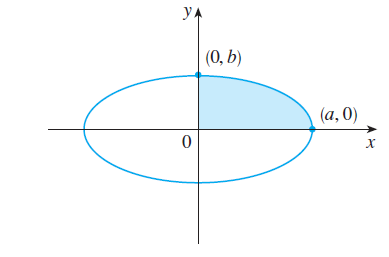

Calculating the area in the first quadrant using double integral and multiply by 4 $,i.e., \displaystyle\large{A= \int_{-a}^{a} \int_{-b \sqrt{1-\frac{x^2}{a^2}}}^{b \sqrt{1-\frac{x^2}{a^2}}} \text{ d}y \text{ d}x}$

In [27]:
a,b = 1,2         # input initial value
f1  = lambda y, x: np.exp(-(x**2+y**2))*((x**2)/(a**2))+((y**2)/(b**2))# f = charge density * area
Q1  = (si.dblquad(f1,-a, a, lambda x:-(b/a)*(((a**2)-(x**2))**0.5),
                            lambda x:(b/a)*(((a**2)-(x**2))**0.5))[0]) # charge
print('q =',Q1,'C')   

q = 2.156579168296644 C


Q2. Electric field at some region is given as $\displaystyle{\vec{E}= 3 (r^2 \cos^2 θ − 1) \hat{r}+ 2 r^2 \sinθ \hat{θ}}$. 
Find the total charge within a sphere of radius 2.

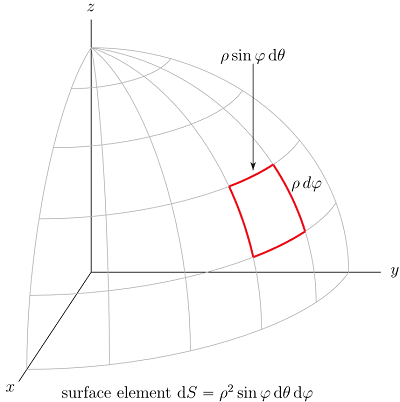


$ \displaystyle \newcommand{\ud}{\,\mathrm{d}} {\\  
 \oint\vec{E}\cdot\ud\vec{s}=\frac{Q}{\epsilon_0} => Q= \oint\epsilon_0\vec{E}\cdot\ud\vec{s}} $
 
 $ \displaystyle{\text{permittivity of free space : }\epsilon_0 = 8.85 * 10^{-12} C^2/Nm^2 
\text{ and for sphere : } \ud \vec{s}=r^2\sin\theta \ud \theta \ud \phi \ud r \hat{r} }$

$ \displaystyle{ \vec{E} \cdot \ud \vec{s} = (3 (r^2 \cos^2 θ − 1) \hat{r}+ 2 r^2 \sinθ \hat{θ}) \cdot (r^2\sin\theta \ud \theta \ud \phi \hat{r})= (3 (r^2 \cos^2 θ − 1) )\times(r^2\sin\theta \ud \theta \ud \phi )}$

$ \displaystyle{ \text{as } \hat{r}\cdot\hat{r}=1,\hat{\theta}\cdot\hat{\theta}=1,\hat{\phi}\cdot\hat{\phi}=1,\hat{r}\cdot\hat{\theta}=0,\hat{r}\cdot\hat{\phi}=0,\hat{\theta}\cdot\hat{\phi}=0}$

$ \displaystyle{Q = \iint \epsilon_0 \vec{E} \cdot \ud \vec{s} = \iint 3 \epsilon_0 (r^2 \cos^2 θ − 1) \times r^2\sin\theta \ud \theta \ud\phi }$

In [28]:
r  = 2                          # given radius
𝜖 = 8.85 * 10**(-12)           # permittivity of free space
𝜙2 = lambda 𝜙, 𝜃 : np.dot(𝜖*(3*((r**2*np.cos(𝜃)**2)-1)), np.sin(𝜃)*r**2)  # 𝜖₀E⋅ ds
Q2 = si.dblquad(𝜙2, 0, np.pi, lambda 𝜙: 0, lambda 𝜙: 2*np.pi)   # total charge
print('q =',Q2[0],'C')

q = 4.4484951974831474e-10 C


Q3. Hydrogen atom wave function in $2p_{0}$ state is given by $\displaystyle{ψ_{2p_0} = \frac{1}{4 \sqrt{2\pi}} \sqrt{\frac{1}{a_0^3}} \frac{r}{a_0} \exp(− \frac{r}{2a_0})}$. 

Find the values of the uncertainties in $x$ and $z$ direction.
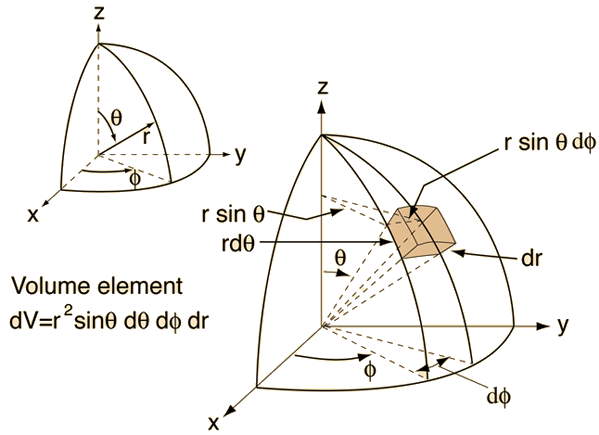                           

uncertainty of position : $ \displaystyle {\Delta{x} = \sqrt{<\hat{x}^2> - <\hat{x}>^2}}$



$\displaystyle { x=r\sin\theta \cos\phi \text{ and } z=r\cos\theta }$

$\displaystyle {<\hat{x}^2> \ = \iiint (\psi_{2p_0})^2 r^2 \sin^2\theta  \cos^2\phi \cdot r^2 \sin \theta \text{ d}\theta \text{ d}\phi \text{ d}r }$

$\displaystyle {<\hat{x}> \ = \iiint (\psi_{2p_0})^2 r \sin\theta \cos\phi \cdot r^2 \sin \theta \text{ d}\theta \text{ d}\phi \text{ d}r}$

$\displaystyle {<\hat{z}^2> \ = \iiint (\psi_{2p_0})^2 r^2 \cos^2\theta \cdot r^2 \sin\theta \text{ d}\theta \text{ d}\phi \text{ d}r }$

$\displaystyle {<\hat{z}> \ = \iiint (\psi_{2p_0})^2 r \cos\theta \cdot r^2 \sin\theta \text{ d}\theta \text{ d}\phi \text{ d}r}$

In [29]:
a = 1
fx2 = lambda 𝜙,𝜃,r:(1/(4*(2*np.pi)**0.5)*(1/(a**3))**0.5*(r/a)*np.exp(-r/(2*a))*r*np.sin(𝜃)*np.cos(𝜙))**2*r**2*np.sin(𝜃)
x2  = si.tplquad(fx2,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,𝜃:0,lambda r,𝜃:np.pi*2)[0]   # <𝑥̂²>
fx1 = lambda 𝜙,𝜃,r:(1/(4*(2*np.pi)**0.5)*(1/(a**3))**0.5*(r/a)*np.exp(-r/(2*a)))**2*r*np.sin(𝜃)*np.cos(𝜙)*r**2*np.sin(𝜃)
x1  = si.tplquad(fx1,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,𝜃:0,lambda r,𝜃:np.pi*2)[0]   # <𝑥̂ >
dx  = (x2-(x1**2))**0.5     # Δ𝑥
print('<𝑥̂>:',x1,'\t<𝑥̂\u00b2>:',x2,'\tdx:\u221A{<𝑥̂\u00b2>-<𝑥̂>\u00b2} =',dx)

fz2 = lambda 𝜙,𝜃,r: (1/(4*(2*np.pi)**0.5)*(1/(a**3))**0.5*(r/a)*np.exp(-r/(2*a))*r*np.cos(𝜃))**2*r**2*np.sin(𝜃)
z2  = si.tplquad(fz2,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,𝜃:0,lambda r,𝜃:np.pi*2)[0]   # <𝑧̂²>
fz1 = lambda 𝜙,𝜃,r: (1/(4*(2*np.pi)**0.5)*(1/(a**3))**0.5*(r/a)*np.exp(-r/(2*a)))**2*r*np.cos(𝜃)*r**2*np.sin(𝜃)
z1  = si.tplquad(fz1,0,np.inf,lambda r:0,lambda r:np.pi,lambda r,𝜃:0,lambda r,𝜃:np.pi*2)[0]   # <𝑧̂ >
dz  = (z2-(z1**2))**0.5     #  Δz
print('<𝑧̂>:',z1,'\t<𝑧̂\u00b2>:',z2,u'\tdz:\u221A{<𝑧̂\u00b2>-<𝑧̂>\u00b2} =',dz)

<𝑥̂>: 4.549610406684606e-16 	<𝑥̂²>: 30.0 	dx:√{<𝑥̂²>-<𝑥̂>²} = 5.477225575051661
<𝑧̂>: 7.468401574530467e-16 	<𝑧̂²>: 30.0 	dz:√{<𝑧̂²>-<𝑧̂>²} = 5.477225575051661


# $$ \text{ASSIGNMENT 5} $$
#### $$\textit{Roots Searching using Bisection, Regula False, Secant and Newton Raphson methods}$$

In [25]:
def bisection(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = (a_n + b_n)/2
        f_c_n = f(c_n)
        if f(a_n)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            print("Found exact solution.")
            return c_n
        else:
            print("Bisection method fails.")
            return None
    return (n,(a_n + b_n)/2)

def secant(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_c_n = f(c_n)
        if f(a_n)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            return (n,c_n)
        else:
            print("Secant method fails.")
            return None
    return (n,a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n)))

def regulaFalsi(f,a,b,TOL,N):
    for n in range(0,N):
        while abs(b-a) > TOL:
            c = (a*f(b)-b*f(a))/(f(b) - f(a))
            FA = f(a)
            Fc = f(c)
            if(Fc == 0) :
                break
            if(f(a)*f(b)) > 0:
                break
            if(FA*Fc > 0):
                a = c
            else:
                b = c
    return (n,c)

def newtonRaphson(f,Df,x0,TOL,N):
    xn = x0
    for n in range(0,N):
        fxn = f(xn)
        if abs(fxn) < TOL:
            return (n,xn)
        Dfxn = Df(xn)
        xn = xn - fxn/Dfxn
    return (n,xn)

Q1. When you deduce Wien’s displacement law from Planck’s law, you finally arrive at an equation $x=3(1-\exp(-x))$ , where $\displaystyle{x=\frac{\hbar\omega_m}{kT}}$.                                                                                         
Solve this equation to deduce Wien’s displacement law.

In [26]:
f=lambda x:3*(1-np.exp(-x))-x
Df=lambda x:(3*np.exp(-x))-1

a,b = 1,100
TOL,N=1e-15,25
x=np.linspace(0,3,10000)

A=["bisection","secant","regulaFalsi","newtonRaphson"]
bn,bx=bisection(f,a,b,N)
sn,sx=secant(f,a,b,N)
fn,fx=regulaFalsi(f,a,b,TOL,N)
rn,rx=newtonRaphson(f,Df,x0=a+0.5,TOL=1e-15,N=25)
display(pd.DataFrame({'method':A,'itterations':[bn,sn,fn,rn],' roots ':[bx,sx,fx,rx]}))

,method,itterations,roots
0,bisection,25,2.821441
1,secant,22,2.821439
2,regulaFalsi,24,2.821439
3,newtonRaphson,5,2.821439


Q2. Single slit diffraction patterns are found to be proportional to $\large\bigg(\frac{\sin{x}}{x}\bigg)^2$.                         
Find the first three position of the maximum for $x>0$ by **Bisection, Regula False,Secant and Newton Raphson methods**

In [27]:
def f(x):
    try :
        y =  x - np.tan(x)
    except:
        y = 0
    return y

def g(x): 
    return (-np.tan(x))**2

TOL,N=1e-6,900
A=[np.pi,2*np.pi,3*np.pi]
B=[3*np.pi/2,5*np.pi/2,7*np.pi/2]
C=[4.3,7.4,10.6]
D=[4.7,7.9,11.1]
T1,T2,T3,T4=[],[],[],[]
for a,b,c,d in zip(A,B,C,D):
    T1.append(bisection(f,a,b,N)[1])
    T2.append(secant(f,a+1.34,b,N)[1])
    T3.append(regulaFalsi(f,c+.26,d,TOL,N)[1])
    T4.append(newtonRaphson(f,g,d-0.1,TOL,N)[1])
display(pd.DataFrame({'Bisection Method':T1,'Secant Method':T2,'Regula Falsi Method':T3,'Newton Raphson Method':T4}))

,Bisection Method,Secant Method,Regula Falsi Method,Newton Raphson Method
0,4.493409,4.481593,4.556311,4.712389
1,7.725252,7.623185,7.637197,7.853982
2,10.904122,10.764778,10.810502,10.995574


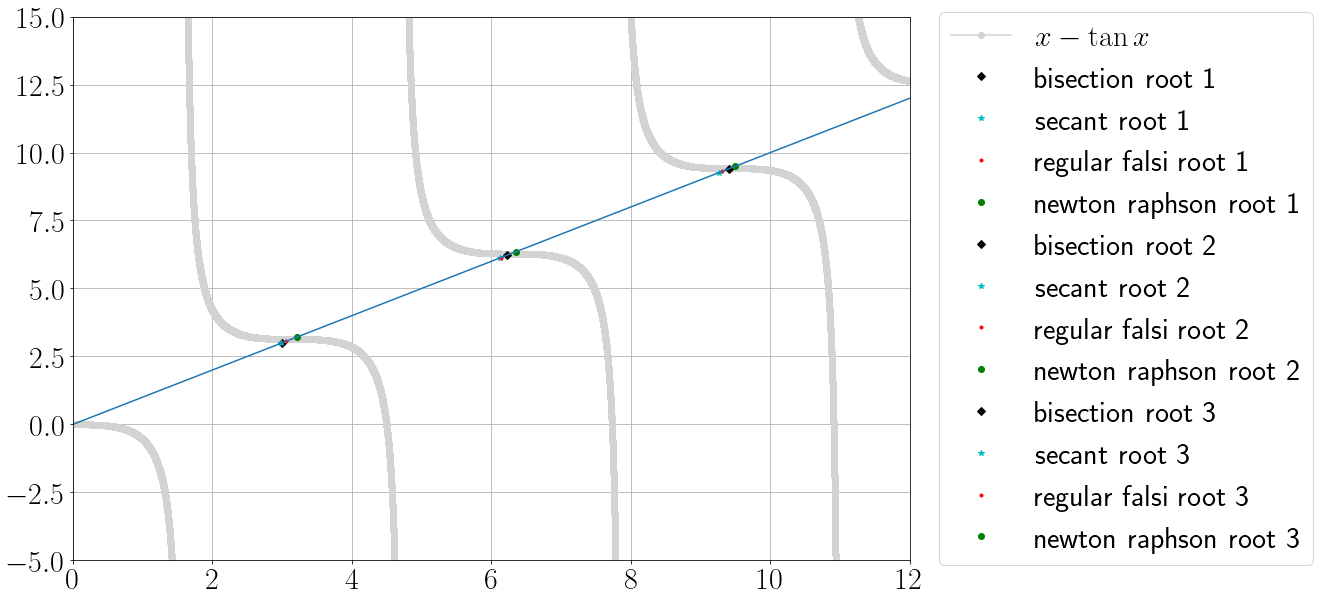

In [28]:
plt.figure(figsize=(15,10))
plt.ylim(-5,15)
plt.xlim(0,12)
x=np.arange(0,18*np.pi,0.0001)
y=f(x)
yM = np.ma.masked_where(np.abs(y)>20., y)
plt.plot(x,yM,'o-',label=r'$x - \tan x$',color='lightgrey')
for i in range(3):    
    plt.plot(x[i]-1.5+T1[i],T1[i]-1.5,'kD',label='bisection root %i'%(i+1))
    plt.plot(x[i]-1.5+T2[i],T2[i]-1.5,'c*',label='secant root %i'%(i+1))
    plt.plot(x[i]-1.5+T3[i],T3[i]-1.5,'r.',label='regular falsi root %i'%(i+1))
    plt.plot(x[i]-1.5+T4[i],T4[i]-1.5,'go',label='newton raphson root %i'%(i+1))
plt.plot(x,x)
plt.legend(bbox_to_anchor=(1.5, 0.5),fontsize=30,loc='center right')
plt.grid()
plt.show()   

Q3.$f(x)=\sin x$ has a root at $x=\pi$. Try Newton Raphson method to find this root with different guess values $x_o\in\large(\frac{\pi}{2},\frac{3\pi}{2})$.                                                                               
Output your value of the root in the form of a table.

In [29]:
x   = np.linspace(np.pi/2+0.01,3*np.pi/2+1,20)
NR1,NR2,X1=[],[],[]
for x0 in x:
    NRn,NRc=newtonRaphson(lambda x: np.sin(x),lambda x: np.cos(x),x0,TOL = 1e-10,N = 10)
    NR1.append(NRn)
    NR2.append(NRc)
    X1.append(x0)
display(pd.DataFrame({'Guess value':X1, 'Itterations':NR1, 'Root':NR2}))

,Guess value,Itterations,Root
0,1.580796,6,100.530965
1,1.798249,4,6.283185
2,2.015701,5,3.141593
3,2.233153,4,3.141593
4,2.450605,4,3.141593
5,2.668058,3,3.141593
6,2.885510,3,3.141593
7,3.102962,2,3.141593
8,3.320414,3,3.141593
9,3.537867,3,3.141593


$\text{Comments : Newton-Raphson Method does not gurantee to find same root for every possible limit}$

## Multi Dimensional Newton Raphson Method

Let us assume that our guess values be $(x_0,y_0)$ while the roots are at $(x^*,y^*)$. 

Let us expand $f(x,y)$ and $g(x,y)$ around upto first order $(x_0,y_0)$.

Let $\displaystyle{x^*=x_0+\eta}$ and $\displaystyle{y^*=y_0+\xi} $

$\displaystyle{f(x,y)=f(x_0,y_0)+(x-x_0)\frac{\partial{f}}{\partial{x}} \bigg|_{(x_0,y_0)}+(y-y_0)\frac{\partial{f}}{\partial{y}} \bigg|_{(x_0,y_0)} }$

$\displaystyle{f(x^*,y^*)=0=f(x_0,y_0)+\eta\frac{\partial{f}}{\partial{x}} \bigg|_{(x_0,y_0)}+\xi\frac{\partial{f}}{\partial{y}} \bigg|_{(x_0,y_0)}} $

$\displaystyle{g(x^*,y^*)=0=g(x_0,y_0)+\eta\frac{\partial{g}}{\partial{x}} \bigg|_{(x_0,y_0)}+\xi\frac{\partial{g}}{\partial{y}} \bigg|_{(x_0,y_0)}}$

If $(x^*,y^*)$ is not the root then iterate again taking $\displaystyle{(x_0,y_0)=(x^*,y^*)}$

Stop if root is found at $\displaystyle{abs(f(x^*,y^*))<tolerance}$ and $\displaystyle{abs(g(x^*,y^*))<tolerance}$

In [30]:
def MD(f,a,root,guess_interval):
    A=[]
    while len(A) < root:
        b=a + guess_interval
        x0=a
        x1=b
        fx0=f(x0)
        fx1=f(x1)  
        if f(x0)*f(x1) < 0:
            while abs(f(x1))>1e-8:
                x2=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0))
                x0,x1=x1,x2
                fx0,fx1=f(x1),f(x2)
            A.append(x2)    
        a=b
    return A

Q4. Find all four roots of                                                                                                       
$ \qquad\qquad x^2+y^2=16,\qquad x*y=2 $                                                                                         
Compare this with your graphical analysis. (Use one of the bracketing methods)


  Theoritical & Graphical Study using Multi-Dimensional Method


,X,Y
0,-3.968119,-0.504017
1,-0.504017,-3.968119
2,0.504017,3.968119
3,3.968119,0.504017


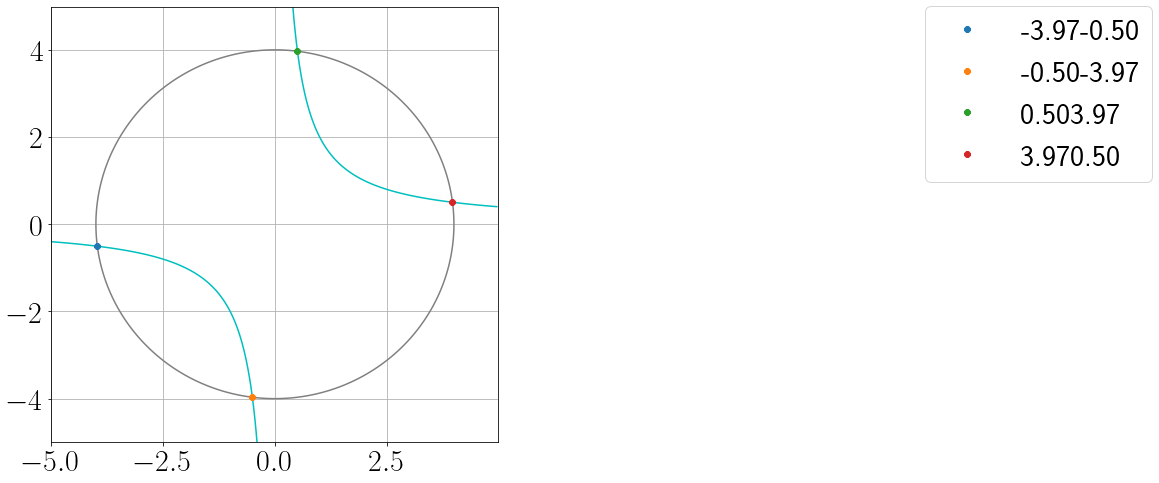

In [31]:
def f(x):
    y=(2/x)
    return (x**2+y**2)-16

Roots = MD(f, a = -5, root = 4, guess_interval = 0.4)

delta = 0.025
plt.subplots(figsize=(8,8))
xrange = np.arange(-5, 5, delta)
yrange = np.arange(-5, 5, delta)
X, Y = np.meshgrid(xrange,yrange)
G = X * Y
F = X**2 + Y**2 
plt.contour( X, Y, F, [16], colors='grey')
plt.contour( X, Y, G,[2], colors='c')

Xr,Yr=[],[]
print('  Theoritical & Graphical Study using Multi-Dimensional Method')
for xi in Roots:
    Xr.append(xi)
    Yr.append(2/xi)
    plt.plot(xi,2/xi,'8',label='{:.2f}{:.2f}'.format(xi,2/xi))
display(pd.DataFrame({'X':Xr,'Y':Yr})) 
plt.grid(True)
plt.legend(bbox_to_anchor=(2.5, 0.8),fontsize=30,loc='center right')
plt.show()

  Theoritical & Graphical Study using Multi-Dimensional Method


,X,Y
0,-3.968119,-0.504017
1,-0.504017,-3.968119
2,0.504017,3.968119
3,3.968119,0.504017


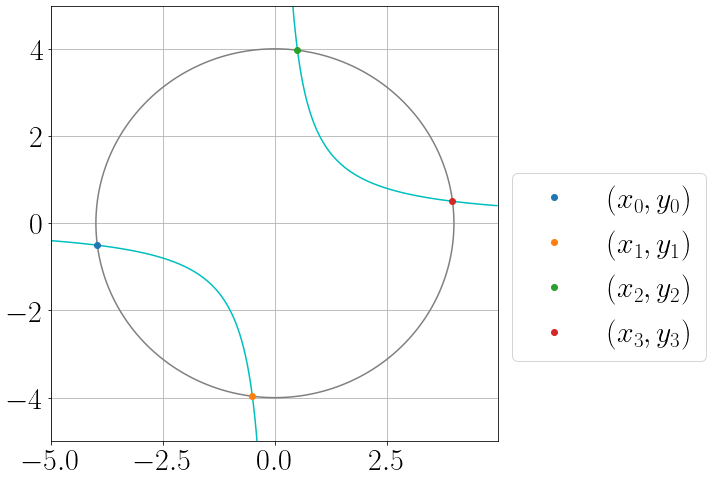

In [32]:
def f(x):
    y=(2/x)
    return (x**2+y**2)-16

Roots = MD(f, a = -5, root = 4, guess_interval = 0.4)

delta = 0.025
plt.subplots(figsize=(8,8))
xrange = np.arange(-5, 5, delta)
yrange = np.arange(-5, 5, delta)
X, Y = np.meshgrid(xrange,yrange)
G = X * Y
F = X**2 + Y**2 
plt.contour( X, Y, F, [16], colors='grey')
plt.contour( X, Y, G,[2], colors='c')

Xr,Yr=[],[]
print('  Theoritical & Graphical Study using Multi-Dimensional Method')
for xi in Roots:
    Xr.append(xi)
    Yr.append(2/xi)
    plt.plot(xi,2/xi,'o')
display(pd.DataFrame({'X':Xr,'Y':Yr})) 
plt.grid(True)
plt.legend(['$(x_0,y_0)$','$(x_1,y_1)$','$(x_2,y_2)$','$(x_3,y_3)$'],
           bbox_to_anchor=(1.5, 0.4),fontsize=30,loc='center right')
plt.show()

Q5. Find the complex root of
$$z^3+2z^2+1=0$$
Hint: write $z=x+iy$ and then separate the given equation into real and imaginary parts. You will get two equations involving $x, y.$

In [33]:
f= lambda x,y :x**3-3*x*y**2+2*x**2-2*y**2+1
g= lambda x,y :3*x**2*y-y**3+4*x*y
tol = 1e-6

def multdim(f,g,x0,y0):
    while abs(f(x0,y0)) > tol and abs(g(x0,y0)) > tol :
        dfdx=2*x0**2-6*y0**2+4*x0
        dfdy=-6*x0*y0-4*y0
        dgdx=6*x0*y0+4*y0
        dgdy=3*x0**2-3*y0**2+4*x0
        a=g(x0,y0)*dfdy-f(x0,y0)*dgdy
        b=f(x0,y0)*dgdx-g(x0,y0)*dfdx
        c=(dfdx*dgdy)-(dgdx*dfdy)
        h=a/c
        k=b/c
        x0=float(x0+h)
        y0=float(y0+k)
    return x0,y0

print('\tTheoritical Study using Multi-Dimensional Method')
A=[0.00,0.00,1.00,-1.00]
B=[1.00,-1.00,0.00,0.00]
Xr,Yr=[],[]
for i,j in zip(A,B):
    Xr.append(multdim(f,g,i,j)[0])
    Yr.append(multdim(f,g,i,j)[1])
display(pd.DataFrame({'X':Xr,'Y':Yr})) 

	Theoritical Study using Multi-Dimensional Method


,X,Y
0,0.102773,0.665418
1,0.102773,-0.665418
2,1.000000,0.000000
3,-1.000000,0.000000


Q6.Solve the equation to find first three roots. & Compare this with your graphical analysis. :                                
$\qquad\qquad x\tan x=y,\qquad x^2+y^2=a^2 $                                                                                        
(Hint Eliminate and form an equation of a single variable, Use one of the bracketing methods).

  Theoritical & Graphical Study using Multi-Dimensional Method


,X,Y
0,1.395466,7.877352
1,4.164831,6.830387
2,6.830674,4.164359


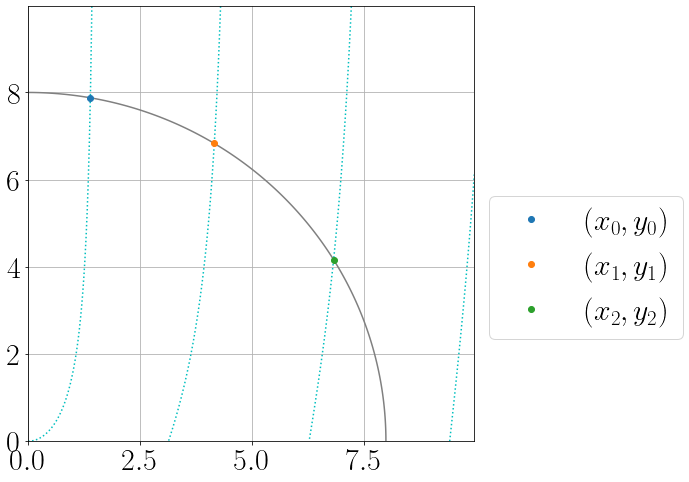

In [34]:
delta = 0.025
plt.subplots(figsize=(8,8))
xrange = np.arange(0, 10, delta)
yrange = np.arange(0, 10, delta)
X, Y = np.meshgrid(xrange,yrange)
G = (X*np.tan(X)) - Y
GM=np.ma.masked_where(np.abs(G)>20., G)
F = (X**2) + (Y**2)
plt.contour(X, Y, F, [64], colors='grey')
plt.contour(X, Y, GM, [0], colors='c',linestyles= 'dotted')

def f(x):
    y=x*np.tan(x)
    return (x**2+y**2)-64

Roots = MD(f, a = 1, root = 5, guess_interval = 0.4)
Xr,Yr=[],[]
print('  Theoritical & Graphical Study using Multi-Dimensional Method')
for i in Roots:
    if (i>0) and (i*np.tan(i)>0):
        Xr.append(i)
        Yr.append(i*np.tan(i))
        plt.plot(i,(i*np.tan(i)),'o')
display(pd.DataFrame({'X':Xr,'Y':Yr})) 
plt.grid(True)
#plt.legend(bbox_to_anchor=(2.5, 0.8),fontsize=30,loc='center right')
plt.legend(['$(x_0,y_0)$','$(x_1,y_1)$','$(x_2,y_2)$','$(x_3,y_3)$'],
           bbox_to_anchor=(1.5, 0.4),fontsize=30,loc='center right')
plt.show()

Q7.Solve the equation to find first three roots & Compare this with your graphical analysis. :                                 
$\qquad\qquad x\cot x=-y,\qquad x^2+y^2=a^2 $                                                                                   
(Hint Eliminate and form an equation of a single variable, Use one of the bracketing methods)

  Theoritical & Graphical Study using Multi-Dimensional Method


,X,Y
0,2.785902,7.499250
1,5.521446,5.789096
2,7.957321,0.825248


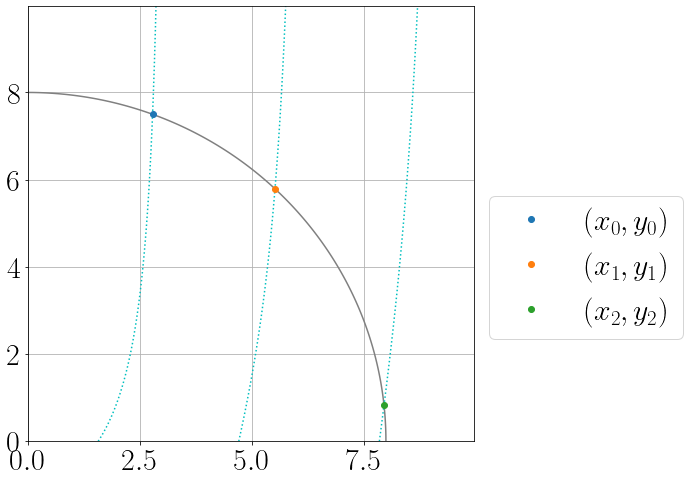

In [35]:
delta = 0.025
plt.subplots(figsize=(8,8))
xrange = np.arange(-0, 10, delta)
yrange = np.arange(-0, 10, delta)
X, Y = np.meshgrid(xrange,yrange)
G = (X/np.tan(X))+Y
GM=np.ma.masked_where(np.abs(G)>20., G)
F = (X**2)+(Y**2)
plt.contour(X, Y,F, [64], colors='grey')
plt.contour(X,Y,GM,[0], colors='c',linestyles= 'dotted')

def f(x):
    y=(-x/np.tan(x))
    return x**2+y**2-64

Roots = MD(f, a = 1, root = 5, guess_interval = 0.4)
Xr,Yr=[],[]

print('  Theoritical & Graphical Study using Multi-Dimensional Method')
for i in Roots:
    if (i>0) and (-i/np.tan(i)>0) :
        Xr.append(i)
        Yr.append(-i/np.tan(i))
        plt.plot(i,(-i/np.tan(i)),'o')
display(pd.DataFrame({'X':Xr,'Y':Yr})) 
plt.grid(True)
#plt.legend(bbox_to_anchor=(2.5, 0.8),fontsize=30,loc='center right')
plt.legend(['$(x_0,y_0)$','$(x_1,y_1)$','$(x_2,y_2)$','$(x_3,y_3)$'],
           bbox_to_anchor=(1.5, 0.4),fontsize=30,loc='center right')
plt.show()

Q8. Energy levels of a particle in a spherical box is given by the equation $j_l(ka)=0$                                    
Where $j_l(x)$ is Spherical Bessel Function of order $l$. There are infinite number of roots for a given $l$.               
Find the first three roots for each value of $l\in[0,1,2]$.                                                                
Energy is given by $\large\frac{\hbar^2(ka)^2}{2ma^2}$. Label the states and arrange them in the increasing value of energy.

For Spherical Bessel function $:\\ \qquad\qquad $
`from scipy.special import spherical_jn`

,$Roots$,Position
0,$1J_0(x)$,3.14
1,$1J_1(x)$,4.49
2,$1J_2(x)$,5.76
3,$2J_0(x)$,6.28
4,$2J_1(x)$,7.72
5,$2J_2(x)$,9.09
6,$3J_0(x)$,9.42
7,$3J_1(x)$,10.89
8,$3J_2(x)$,12.31


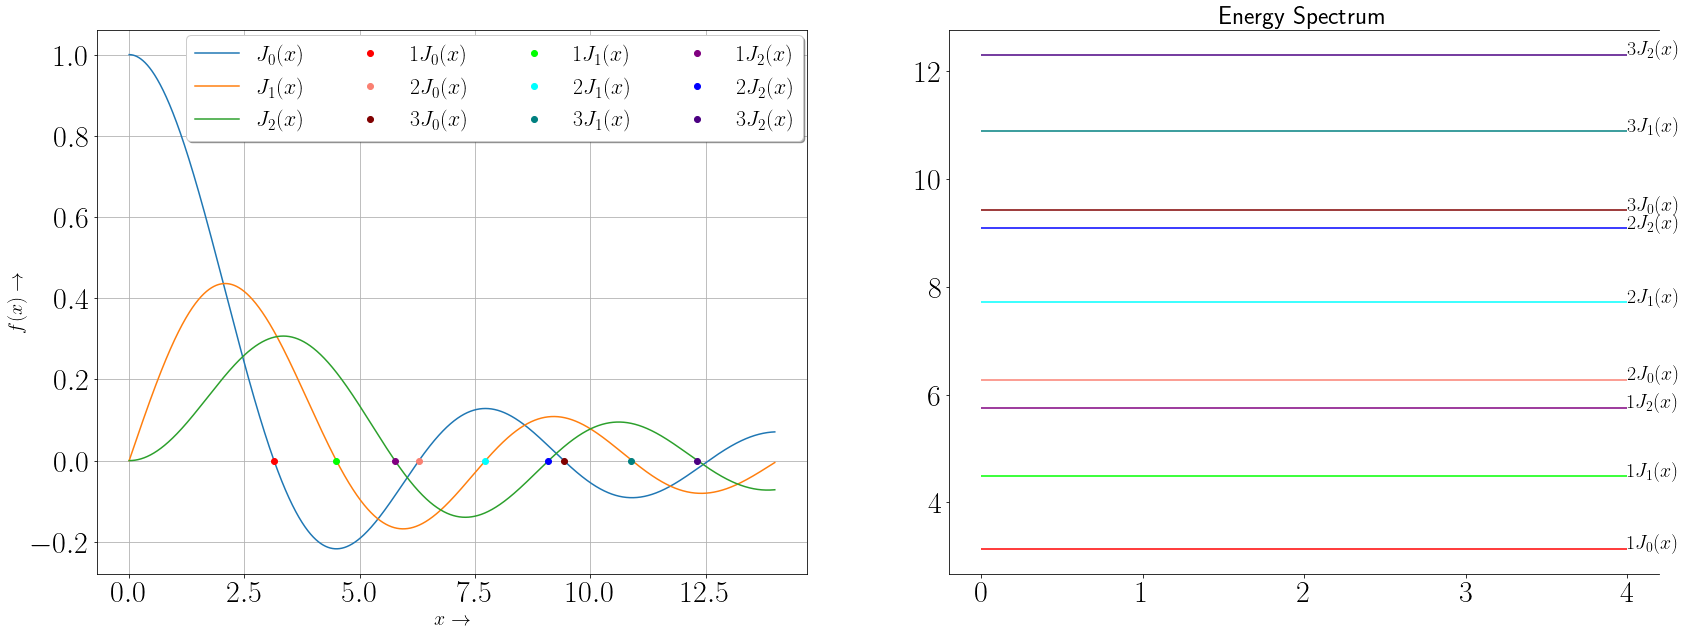

In [36]:
from scipy.special import spherical_jn

x=np.linspace(0,14,50000)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(28,10))

def bisection(f,a,b,tol):
    while (abs(a-b)>=tol):
        c=(a+b)/2
        if (f(a)*f(c)) > tol:
            a=c
        elif (f(a)*f(c)) < tol:  
            b=c
    return c

np.set_printoptions(precision=2, suppress=True)
P=[r'$1J_0(x)$',r'$2J_0(x)$',r'$3J_0(x)$',
   r'$1J_1(x)$',r'$2J_1(x)$',r'$3J_1(x)$',
   r'$1J_2(x)$',r'$2J_2(x)$',r'$3J_2(x)$']
T=[]
for l in range(3):
    ax1.plot(x,spherical_jn(l,x),label=r'${J}_%i(x)$'%l)
    L1=[]
    for i in range(1,11):
        s=bisection(lambda x:spherical_jn(l,x),i,6+i,1e-6)
        L1.append(round(s,2))
    ka=[i for n, i in enumerate(L1) if i not in L1[:n]]
    ka=[i for i in ka[:3]]
    T += ka
c = ['red','salmon','maroon','lime','cyan','teal','purple','blue','indigo']
for k in range(len(T)):
    ax1.plot(T[k],0,'o',color=c[k],label=P[k])
Y=zip(P,T)
Z=list(sorted(Y,key= lambda x:x[1]))
display(pd.DataFrame(np.asarray(Z).T,index=['$Roots$','Position']).T)
ax1.grid()
ax1.set_xlabel(r'$x\rightarrow$',fontsize=20)
ax1.set_ylabel(r'$f(x)\rightarrow$',fontsize=20)
ax1.legend(bbox_to_anchor=(0.56, 1.01),fontsize=22,loc='upper center',
           fancybox=True, shadow=True, ncol=4)
ax2.hlines(y=T,xmin=0,xmax=4,color=c,linestyle='-')
for n in range(len(T)):
    ax2.text(4,T[n],P[n],size=20)
ax2.set_title('Energy Spectrum',fontsize=25)
ax2.spines['right'].set_color('none')
plt.show()

# $$ \text{ASSIGNMENT 6} $$
## $$\text{Linear Algebra}$$

Q1.Using **Gauss elimination method** to form a upper triangulation of matrix  .      
And find the **determinant** by multiplying its diagonal and check using `np.linalg.det()`

In [2]:
from sympy import *
import sympy as sp

def gauss(a):
    m, n = a.shape               
    M = a.copy()
     
    for k in range(n):                        
        for j in range(k+1,n):                      
            q = float(M[j][k]) / M[k][k]  # lambda
            for m in range(k, n): 
                M[j][m] -=  q * M[k][m]        
    return M

In [61]:
A = np. array([[ 1., 0., 0., 0.],
               [ 2., 2., 0., 0.],
               [ 3., 6., 3., 0.],
               [ 5., 3., 2., 4.]])

M = gauss(A)
display(Math(r'A = '+latex(sp.Matrix(np.round(M,2)))))
display(Math(r'|A| = '+latex(N(sp.det(sp.Matrix(M)),2))))
print('****************************************')
# using np.linalg.det(A) :
display(Math(r'|A| = '+latex(np.linalg.det(A))))
print('****************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

****************************************


<IPython.core.display.Math object>

****************************************


Q2. Using **Gauss elimination method** to solve a system of equation by **backward substitution** method   .               
And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [62]:
def gauss_elmbk(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b))                      #augmented_mat
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    for k in range(n):                       
        for j in range(k+1,n):                      
            q = float(M[j][k]) / M[k][k]       # lambda
            for m in range(k, n+1):    # Forward Elimination - Subtracting rows
                M[j][m] -=  q * M[k][m] 
    display(Math(r'A|B = '+latex(sp.Matrix(np.round(M,2)))))
    
    x = np.zeros(n)
    x[n-1] = float(M[n-1][n]) / M[n-1][n-1]  
    for i in range (n-1,-1,-1):                 # Backwards Substitution 
        z = 0.0                                     
        for j in range(i+1,n):                     
            z = z  + float(M[i][j])*x[j]   
        x[i] = float(M[i][n] - z) / M[i][i]
    return x

In [63]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

b = np.array([6., 25., -11., 15.])

X = gauss_elmbk(A, b)
display(Math(r'X = '+latex(sp.Matrix(np.round(X,2)))))
print('**************************************************************')
# direct read using numpy.linalg.solve() :
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b)))))
print('**************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**************************************************************


<IPython.core.display.Math object>

**************************************************************


In [64]:
A = np. array([[  1.,  2., -1.,  1.],
               [ -1.,  1.,  2., -1.],
               [  2., -1.,  2.,  2.],
               [  1.,  1., -1.,  2.]])

b = np. array([ 6., 3., 14., 8.])

X = gauss_elmbk(A, b)
display(Math(r'X = '+latex(sp.Matrix(np.round(X,2)))))
print('**************************************************************')
# direct read using numpy.linalg.solve() :
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b)))))
print('**************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**************************************************************


<IPython.core.display.Math object>

**************************************************************


Q3.Using **Gauss elimination method with pivot and backward substitution method** to solve a system of equation .           
And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [65]:
def gauss_pivot(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b))                   #augmented_mat
    display(Math(r'A|B = '+latex(sp.Matrix(M))))

    def swaprows(v,i,j):
        if len(v.shape) == 1: v[i],v[j] = v[j],v[i]
        else:   v[[i,j],:] = v[[j,i],:]
    s = np.zeros(n)
    for i in range(n):  s[i] = max(np.abs(M[i,:]))
    for k in range(n):       
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k   # row interchange, if needed
        if p != k: swaprows(M,k,p)
        for j in range(k+1,n):  
            q = float(M[j][k]) / M[k][k]        # lambda
            for m in range(k, n+1): M[j][m] -=  q * M[k][m] # Forward Elimination 
    display(Math(r'A|B = '+latex(sp.Matrix(np.round(M,2)))))
    x = np.zeros(n)
    x[n-1] =float(M[n-1][n]) / M[n-1][n-1]  
    for i in range (n-1,-1,-1):                         # Backwards Substitution         
        z = 0.0                                     
        for j in range(i+1,n): z = z  + float(M[i][j])*x[j]   
        x[i] = float(M[i][n] - z) / M[i][i]    
    return x       

In [67]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

b = np.array([6., 25., -11., 15.])

X = gauss_pivot(A, b)
display(Math(r'X = '+latex(sp.Matrix(np.round(X,2)))))
print('**************************************************************')
# direct read using numpy.linalg.solve() :
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b)))))
print('**************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**************************************************************


<IPython.core.display.Math object>

**************************************************************


In [68]:
A = np. array([[  1.,  2., -1.,  1.],
               [ -1.,  1.,  2., -1.],
               [  2., -1.,  2.,  2.],
               [  1.,  1., -1.,  2.]])

b = np.array([ 6., 3., 14., 8.])

X = gauss_pivot(A, b)
display(Math(r'X = '+latex(sp.Matrix(np.round(X,2)))))
print('**************************************************************')
# direct read using numpy.linalg.solve() :
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b)))))
print('**************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**************************************************************


<IPython.core.display.Math object>

**************************************************************


Q4.Using **Gauss elimination method** find the **inverse of matrix** and verify **$A.A^{-1} = \text{I}$** and check using `np.linalg.inv()`

In [15]:
def gauss_elmbk_matrix_inverse(a):
    m, n = a.shape               
    b = np.identity(len(a))
    M = np.hstack((a,b))                        #augmented_mat

    display(Math(r'A|I = '+latex(sp.Matrix(M))))

    for k in range(n+len(a)):                  
        for j in range(k+1,n):                      
            q = float(M[j][k]) / M[k][k]        # lambda
            for m in range(k, n+len(a)):        # Forward Elimination - Subtracting rows 
                M[j][m] -=  q * M[k][m]  

    display(Math(r'A|I = '+latex(sp.Matrix(np.round(M,2)))))
    x = np.zeros(n)

    for i in range(0, n):
        M[i] = M[i] / M[i][i]        
        for j in [k for k in range(0, n) if k != i]:
            M[j] = M[j] - M[i] * M[j][i]
    display(Math(r'I|A^{-1} = '+latex(sp.Matrix(np.round(M,2)))))
    return M[:, n:]

In [17]:
A = np. array([[ 5., -3., -1., 0.],
               [-2.,  1.,  1., 1.],
               [ 3., -5.,  1., 2.],
               [ 0.,  8., -4.,-3.]])

A1 = gauss_elmbk_matrix_inverse(A)
display(Math(r'A^{-1}= '+latex(sp.Matrix(A1.round(2)))))
print('******************************************************')
print('Using the function for direct read numpy.linalg.inv():')
display(Math(r'A^{-1}= '+latex(sp.Matrix(np.round(np.linalg.inv(A),2)))))
print('******************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

******************************************************
Using the function for direct read numpy.linalg.inv():


<IPython.core.display.Math object>

******************************************************


Q5.Using **Gauss Jordan elimination** to solve a system of equation .                           
And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [19]:
def gauss_jordan(a, b):
    m, n = a.shape               
    b = b.reshape(n,1)
    M = np.hstack((a,b))                      #augmented_mat
    display(Math(r'A|B = '+latex(sp.Matrix(M))))
    ol = [[0, m - 1, 1], [m - 1, 0, -1]]               #outer_loop
    for d in range(2):
        for i in range(ol[d][0], ol[d][1], ol[d][2]):
            il = [[i + 1, m, 1], [i - 1, -1, -1]]                #inner_loop
            for j in range(il[d][0], il[d][1], il[d][2]):
                k = (-1) * M[j, i] / M[i, i]
                temp_row = M[i, :] * k
                M[j, :] += temp_row
    for i in range(0, m):
        M[i, :] = M[i, :] / M[i, i]
    display(Math(r'A|B = '+latex(sp.Matrix(np.round(M,2)))))
    return M[:, n]

In [60]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

b = np.array([6., 25., -11., 15.])

X = gauss_jordan(A, b)
display(Math(r'X= '+latex(sp.Matrix(X))))
print('*************************************************************')
print(r'direct read using numpy.linalg.solve()')
display(Math(r'X= '+latex(sp.Matrix(np.linalg.solve(A, b))))) 
print('*************************************************************')

<IPython.core.display.Math object>

# Normalizing the rows


<IPython.core.display.Math object>

<IPython.core.display.Math object>

*************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

*************************************************************


In [58]:
A = np. array([[  1.,  2., -1.,  1.],
               [ -1.,  1.,  2., -1.],
               [  2., -1.,  2.,  2.],
               [  1.,  1., -1.,  2.]])

b = np. array([ 6., 3., 14., 8.])

X = gauss_jordan(A, b)
display(Math(r'X= '+latex(sp.Matrix(X))))
print('*************************************************************')
print(r'direct read using numpy.linalg.solve()')
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b))))) 
print('*************************************************************')

<IPython.core.display.Math object>

# Normalizing the rows


<IPython.core.display.Math object>

<IPython.core.display.Math object>

*************************************************************
direct read using numpy.linalg.solve()


<IPython.core.display.Math object>

*************************************************************


Q6. Using **Gauss Jordan elimination** find the **inverse of matrix** and verify **$A.A^{-1} = \text{I}$** and check using `np.linalg.inv()`

In [22]:
def gauss_jordan_matrix_inverse(a):
    m, n = a.shape              
    b = np.identity(len(a))
    M = np.hstack((a,b))           #augmented_matrix
    display(Math(r'A|I = '+latex(sp.Matrix(M))))
    ol = [[0, m - 1, 1], [m - 1, 0, -1]]           #outer_loop
    for d in range(2):
        for i in range(ol[d][0], ol[d][1], ol[d][2]):
            il = [[i + 1, m, 1], [i - 1, -1, -1]]       #inner_loop
            for j in range(il[d][0], il[d][1], il[d][2]):
                k = (-1) * M[j, i] / M[i, i]
                temp_row = M[i, :] * k
                M[j, :] += temp_row
    for i in range(0, m):
        M[i, :] = M[i, :] / M[i, i]
    display(Math(r'I|A^{-1} = '+latex(sp.Matrix(np.round(M,2)))))
    return M[:, n:]

In [70]:
A = np. array([[ 5., -3., -1., 0.],
               [-2.,  1.,  1., 1.],
               [ 3., -5.,  1., 2.],
               [ 0.,  8., -4.,-3.]])

X = gauss_jordan_matrix_inverse(A)
display(Math(r'A^{-1} = '+latex(sp.Matrix(X.round(2)))+r'A\cdot A^{-1}='+latex(sp.Matrix(np.dot(A,X).round(2)))))
print('******************************************************')
print('Using the function for direct read numpy.linalg.inv():')
display(Math(r'A^{-1} = '+latex(sp.Matrix(np.round(np.linalg.inv(A),2)))))
print('******************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

******************************************************
Using the function for direct read numpy.linalg.inv():


<IPython.core.display.Math object>

******************************************************


Q7. Using **Jacobi iterative method** to solve a system of equation                              
And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [26]:
def jacobi_iterative(a,b,limit = 100):
    m,n = a.shape
    x = np.zeros_like(b)
    for it_count in range(limit+1):   
        x_new = np.zeros_like(x)
        for i in range(a.shape[0]):
            s1 = np.dot(a[i, :i], x[:i])
            s2 = np.dot(a[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / a[i, i]
            if x_new[i] == x_new[i-1]:   # check for convergence
                break
        if np.allclose(x, x_new, atol=1e-10, rtol=0.):
            break
        x = x_new
    return x

In [72]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

b = np.array([6., 25., -11., 15.])

X = jacobi_iterative(A,b)
display(Math(r'X = '+latex(sp.Matrix(X.round(2)))))
print('**************************************************************')
# direct read using numpy.linalg.solve() :
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix(np.linalg.solve(A, b)))))
print('**************************************************************')

<IPython.core.display.Math object>

**************************************************************


<IPython.core.display.Math object>

**************************************************************


Q8. Using **Gauss Seidel iterative method** to solve a system of equation                        
And verify the output **$A.\text{X} = \text{b}$** and check using `np.linalg.solve()`.

In [74]:
def gauss_seidel(a,b,limit=1000):
    m,n = a.shape
    x = np.zeros_like(b)
    for it_count in range(1, limit):
        x_new = np.zeros_like(x)
        for i in range(a.shape[0]):
            s1 = np.dot(a[i, :i], x_new[:i])
            s2 = np.dot(a[i, i + 1 :], x[i + 1 :])
            x_new[i] = (b[i] - s1 - s2) / a[i, i]
        if np.allclose(x, x_new, rtol=1e-8):    # check for convergence
            break
        x = x_new
    return x

In [75]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

b = np.array([6., 25., -11., 15.])

X = gauss_seidel(A,b)
display(Math(r'X='+latex(sp.Matrix(X.round(2)))))
print('**************************************************************')
# direct read using numpy.linalg.solve() :
display(Math(r'X=A^{-1}\cdot B = '+latex(sp.Matrix((np.linalg.solve(A, b)))))) 
print('**************************************************************')

<IPython.core.display.Math object>

**************************************************************


<IPython.core.display.Math object>

**************************************************************


Q9. Using **Gauss Seidel iterative method** find the **inverse of matrix**                      
And verify **$A.A^{-1} = \text{I}$** and check using `np.linalg.inv()`

In [40]:
def gauss_seidel_inv(a,limit=1000):
    m,n = a.shape
    b = np.identity(len(a))
    x = np.zeros_like(b)
    for it_count in range(1, limit):
        x_new = np.zeros_like(x)
        for i in range(a.shape[0]):
            s1 = np.dot(a[i, :i], x_new[:i])
            s2 = np.dot(a[i, i + 1 :], x[i + 1 :])
            x_new[i] = (b[i] - s1 - s2) / a[i, i]
        if np.allclose(x, x_new, rtol=1e-8):    # check for convergence
            break
        x = x_new
    return x

In [76]:
A = np.array([[10., -1.,   2.,  0.],
              [-1., 11.,  -1.,  3.],
              [ 2., -1.,  10., -1.],
              [ 0.,  3.,  -1.,  8.]])

X = gauss_seidel_inv(A)
display(Math(r'A^{-1} = '+latex(sp.Matrix(X.round(2)))+r'A\cdot A^{-1} = '+latex(sp.Matrix(np.dot(A,X).round(2)))))

print('**************************************************************')
# Using the function for direct read numpy.linalg.inv():
display(Math(r'A^{-1} = '+latex(sp.Matrix(np.round(np.linalg.inv(A),2)))))
print('******************************************************')

<IPython.core.display.Math object>

**************************************************************


<IPython.core.display.Math object>

******************************************************


Q10. Find the largest eigenvalue  and corresponding eigenvectors of matrix by **Power method**  
And check the output with  using `np.linalg.eig()`

In [43]:
def power_eigen(M,tol): 
    X = np.ones(len(M))
    den = (X.T).dot(X)
    Y = M.dot(X)
    c,lambda_0,d = 0,0,1

    while abs(d) > tol:
        c += 1
        num = (X.T).dot(Y)
        lambda_1 = num / den
        d = lambda_1 - lambda_0
        lambda_0 = lambda_1
        den = num
        Y = M.dot(Y)
    E = Y / np.linalg.norm(Y)
    return lambda_1,E

In [77]:
M = np.array([[ 4.,-1., 0., 1.],
              [-1., 6.,-2., 0.],
              [ 0.,-2., 3., 2.],
              [ 1., 0., 2., 4.]])

L,E=power_eigen(M,0.00001)
display(Math(r'\lambda_{max} : '+latex(L.round(2))))
display(Math(r'E : '+latex(sp.Matrix(E.round(2)))))
print('***************************************************************')
# direct read using np.linalg.eig() :
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(np.linalg.eig(M)[0],2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(np.linalg.eig(M)[1],2)))))
print('***************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

***************************************************************


<IPython.core.display.Math object>

<IPython.core.display.Math object>

***************************************************************


In [81]:
M = np.array([[   4., 2/3., -4/3., 4/3.],
              [ 2/3.,   4.,    0.,   0.],
              [-4/3.,   0.,    6.,   2.],
              [ 4/3.,   0.,    2.,   6.]])

L,E=power_eigen(M,0.00001)
display(Math(r'\lambda_{max} : '+latex(L.round(2))))
display(Math(r'E : '+latex(sp.Matrix(E.round(2)))))
print('***************************************************************')
# direct read using np.linalg.eig():
display(Math(r'\lambda : '+latex(sp.Matrix((np.linalg.eig(M)[0])).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(np.linalg.eig(M)[1],2)))))
print('***************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

***************************************************************


<IPython.core.display.Math object>

<IPython.core.display.Math object>

***************************************************************


Q11. Find the smallest eigenvalue  and corresponding eigenvectors of matrix by **Inverse Power method**     
And compare the inverse of eigen value $λ⁻¹$ with the original matrix eigen value $λ$ and also from `np.linalg.eig()`

In [48]:
def inverse_power_eigen(M,tol):
    M_inv = np.linalg.inv(M)
    X = np.ones(len(M_inv))
    den = (X.T).dot(X)
    Y = M_inv.dot(X)
    c,lambda_0,d = 0,0,1

    while abs(d) > tol:
        c += 1
        num = (X.T).dot(Y)
        lambda_1 = num / den
        d = lambda_1 - lambda_0
        lambda_0 = lambda_1
        den = num
        Y = M_inv.dot(Y)
    E = Y / np.linalg.norm(Y)
    return lambda_1,E

In [51]:
M = np.array([[ 4.,-2., 1.,-1.],
              [-2., 4.,-2., 1.],
              [ 1.,-2., 4.,-2.],
              [-1., 1.,-2., 4.]])

L,E = inverse_power_eigen(M,0.000001)
display(Math(r'\lambda^{-1}='+latex(L.round(2))+r'\quad \lambda_{min} = '+latex(np.round(1/L,2))))
display(Math(r'X : '+latex(sp.Matrix(np.round(E,2)))))
print('*******************************************************************************')
# direct read using np.linalg.eig() :
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(np.linalg.eig(M)[0],2)).T)))
display(Math(r'\lambda^{-1}:'+latex(sp.Matrix(np.round(np.linalg.eig(np.linalg.inv(M))[0],2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(np.linalg.eig(np.linalg.inv(M))[1],2)))))
print('*******************************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************
direct read using np.linalg.eig()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************


In [52]:
M = np.array([[ 4.,-1., 0., 1.],
              [-1., 6.,-2., 0.],
              [ 0.,-2., 3., 2.],
              [ 1., 0., 2., 4.]])

L,E = inverse_power_eigen(M,0.000001)
display(Math(r'\lambda^{-1}='+latex(L.round(2))+r'\quad \lambda_{min} = '+latex(np.round(1/L,2))))
display(Math(r'X : '+latex(sp.Matrix(np.round(E,2)))))

print('*******************************************************************************')
# direct read using np.linalg.eig() :
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(np.linalg.eig(M)[0],2)).T)))
display(Math(r'\lambda^{-1}:'+latex(sp.Matrix(np.round(np.linalg.eig(np.linalg.inv(M))[0],2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(np.linalg.eig(np.linalg.inv(M))[1],2)))))
print('*******************************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************
direct read using np.linalg.eig()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************


In [53]:
M = np.array([[   4., 2/3., -4/3., 4/3.],
              [ 2/3.,   4.,    0.,   0.],
              [-4/3.,   0.,    6.,   2.],
              [ 4/3.,   0.,    2.,   6.]])

L,E = inverse_power_eigen(M,0.000001)
display(Math(r'\lambda^{-1}='+latex(L.round(2))+r'\quad \lambda_{min} = '+latex(np.round(1/L,2))))
display(Math(r'X : '+latex(sp.Matrix(np.round(E,2)))))

print('*******************************************************************************')
# direct read using np.linalg.eig() :
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(np.linalg.eig(M)[0],2)).T)))
display(Math(r'\lambda^{-1}:'+latex(sp.Matrix(np.round(np.linalg.eig(np.linalg.inv(M))[0],2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(np.linalg.eig(np.linalg.inv(M))[1],2)))))
print('*******************************************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************
direct read using np.linalg.eig()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

*******************************************************************************


Q12. Find all the eigenvalue and corresponding eigenvectors of matrix by **Jacobi method**         
And check the output with  using `np.linalg.eig()`

In [54]:
def jacobi(A,tol = 1.0e-9):
    np.set_printoptions(precision = 2, suppress = True)
    a=np.copy(A)
    def maxElem(a): # Find largest off-diag. element a[k,l]
        n = len(a)
        aMax = 0.0
        for i in range(n-1):
            for j in range(i+1,n):
                if abs(a[i,j]) >= aMax:
                    aMax = abs(a[i,j])
                    k = i
                    l = j
        return aMax,k,l
    
    def rotate(a,p,k,l): # Rotate to make a[k,l] = 0
        n = len(a)
        aDiff = a[l,l] - a[k,k]
        if abs(a[k,l]) < abs(aDiff)*1.0e-36:
            t = a[k,l]/aDiff
        else:
            phi = aDiff/(2.0*a[k,l])
            t = 1.0/(abs(phi) + (phi**2 + 1.0)**0.5)
            if phi < 0.0:
                t = -t
        c = 1.0/(t**2 + 1.0)**0.5
        s = t*c
        tau = s/(1.0 + c)
        temp = a[k,l]
        a[k,l] = 0.0
        a[k,k] = a[k,k] - t*temp
        a[l,l] = a[l,l] + t*temp
        for i in range(k): # Case of i < k
            temp = a[i,k]
            a[i,k] = temp - s*(a[i,l] + tau*temp)
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])      
        for i in range(k+1,l): # Case of k < i < l
            temp = a[k,i]
            a[k,i] = temp - s*(a[i,l] + tau*a[k,i])
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(l+1,n): # Case of i > l
            temp = a[k,i]
            a[k,i] = temp - s*(a[l,i] + tau*temp)
            a[l,i] = a[l,i] + s*(temp - tau*a[l,i])
        for i in range(n): # Update transformation matrix
            temp = p[i,k]
            p[i,k] = temp - s*(p[i,l] + tau*p[i,k])
            p[i,l] = p[i,l] + s*(temp - tau*p[i,l]) 
    n = len(a)
    maxRot = 5*(n**2) # Set limit on number of rotations
    p = np.identity(n) # Initialize transformation matrix
    for i in range(maxRot): # Jacobi rotation loop
        aMax,k,l = maxElem(a)
        if aMax < tol: 
            return np.diagonal(a),p
        rotate(a,p,k,l)
    print ('Jacobi method did not converge')  
    return None

In [80]:
M = np.array([[   4., 2/3., -4/3., 4/3.],
              [ 2/3.,   4.,    0.,   0.],
              [-4/3.,   0.,    6.,   2.],
              [ 4/3.,   0.,    2.,   6.]])

e_val,e_vec=jacobi(M,0.000001)
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(e_val,2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(e_vec,2)))))
print('**********************************************************')
# direct read using np.linalg.eig():
de_val,de_vec=np.linalg.eig(M)
display(Math(r'\lambda : '+latex(sp.Matrix((de_val)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(de_vec,2)))))
print('**********************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**********************************************************


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**********************************************************


In [79]:
M = np.array([[ 4.,-1., 0., 1.],
              [-1., 6.,-2., 0.],
              [ 0.,-2., 3., 2.],
              [ 1., 0., 2., 4.]])

e_val,e_vec=jacobi(M,0.000001)
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(e_val,2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(e_vec,2)))))
print('**********************************************************')
# direct read using np.linalg.eig():
de_val,de_vec=np.linalg.eig(M)
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(de_val,2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(de_vec,2)))))
print('**********************************************************')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**********************************************************


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**********************************************************


In [78]:
M = np.array([[ 4.,-2., 1.,-1.],
              [-2., 4.,-2., 1.],
              [ 1.,-2., 4.,-2.],
              [-1., 1.,-2., 4.]])

e_val,e_vec=jacobi(M,0.000001)
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(e_val,2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(e_vec,2)))))
print('**********************************************************')
# direct read using np.linalg.eig() 
de_val,de_vec=np.linalg.eig(M)
display(Math(r'\lambda : '+latex(sp.Matrix(np.round(de_val,2)).T)))
display(Math(r'X : '+latex(sp.Matrix(np.round(de_vec,2)))))
print('**********************************************************')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**********************************************************


<IPython.core.display.Math object>

<IPython.core.display.Math object>

**********************************************************
